<center>

#     

## 2022./2023.

# Anime

#### Team members: Nika Hell and Josipa Radak

</center>

## Project Description
<br>

---

**Introduction:**
<p align="justify">
Anime is a term for any animated film originating from Japan. This type of animated film is very distinctive and can be easily recognized (characters mostly have large eyes, etc.). Anime enjoys great popularity worldwide today, and there is a wide range of genres (e.g., Sci-Fi, mysteries, fantasies, etc.) and formats (movies, series, specials, etc.). Due to the popularity of Anime, a lot of data about Anime can be found on the web, making the whole story interesting for processing and analysis.

---

**Summary:**
<p align="justify">
In this project, data was collected from a website using the Selenium library. Firstly, lists of the most popular Anime in a given year (2006-2023) were retrieved, followed by details about each individual Anime from those lists. After that, we familiarize ourselves with the data structure and prepare it for further processing and analysis (handling missing values, duplicates in data, and fields with multiple values). Then, through questions, we delve deeper into the data and its characteristics as part of exploratory data analysis (EDA). Alongside EDA, a brief statistical analysis is conducted to learn more about variable dependencies, means, and data dispersion. Following that, using linear regression, we attempt to predict the number of favorite tags for Anime based on popularity. Subsequently, using the Toolz library and streaming function, we explore Anime franchises as they are not uncommon in the world of Anime. Finally, we wrap up the whole story with a simple recommendation system that utilizes cosine distance between two vectors composed of specific columns in our table for certain Anime.

---

**Contents:**

1. Loading and Installing Libraries

2. Data Collection

3. Preliminary EDA and Data Preparation

4. Exploratory Data Analysis

5. Statistics

6. Linear Regression

7. Exploring Anime Franchises Using the Toolz Library and Streaming Function

8. Recommendation System

9. Conclusion

# 1. Loading and Installing Libraries

## Connecting Python Notebook to Google Drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/znanstveno/zp_hell_radak


## [***Selenium***](https://www.selenium.dev/)
The Python library and tool used for automating web browsers to perform a series of tasks is called Selenium. One of its use cases is web scraping to extract useful data and information that might otherwise be inaccessible.

The **Webdriver** is a vital component of this process. It's what will actually automatically open the browser to access the chosen website.

As we're using Google Chrome, we'll install the Chrome driver (other options include Firefox, Internet Explorer, Edge, and Safari).

In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService

In [ ]:
!apt install chromium-chromedriver
chrome_options = webdriver.ChromeOptions()
#regularni chrome ali bez UI
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu0.20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
driver = webdriver.Chrome('chromedriver', options=chrome_options)
## issue last 7 days - https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

##    
[***NumPy***](https://numpy.org/doc/stable/index.html) is a Python library that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

[***Pandas***](https://pandas.pydata.org/) is a Python library for data manipulation and analysis. Specifically, it provides data structures and operations to manipulate numerical tables and time series.

[***SciPy***](https://scipy.org/) is a Python library used for scientific and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, and other tasks common in science and engineering.

[***Matplotlib***](https://matplotlib.org/stable/index.html) is a Python library for plotting and numerical mathematics extension of NumPy.

[***Seaborn***](https://seaborn.pydata.org/#) is a Python library for data visualization based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
import time
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from textwrap import wrap # breaks a paragraph into a text (string) so that each line has a specified maximum character width

# 2. Data Collection
* We will gather data from two interconnected dynamic pages. Since we are dealing with dynamic web pages, we have decided to use Selenium to retrieve the data. When you visit a website with Webdriver, the browser loads all the resources of the web page (JavaScript files, images, CSS files, etc.) and executes all JavaScript on the page. That's why Selenium is ideal in this case.

* As a data source, we have chosen two pages that contain a list and details of Anime:

  * A list of the most popular Anime series in a specific year (from 2006 to 2022) in a particular season:
  [https://anichart.net/](https://anichart.net/)

  * Details about individual Anime:
  [https://anilist.co/](https://anilist.co/)


## 2.1. Fetching the Most Popular Anime for a Specific Season of a Certain Year

The data is available for the period from Winter 2006 to Summer 2023.

###           

In [ ]:
url='https://anichart.net/Summer-2022'
driver.get(url) # fetching the web page

In [ ]:
for i in range(10):
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # script execution - loading until the end of the web page
  time.sleep(2)
driver.page_source

'<html><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no"><base href="/"><link rel="shortcut icon" href="/favicon.ico"><link rel="preload" as="style" href="https://fonts.googleapis.com/css?family=Overpass:400,600,700,800"><link href="https://fonts.googleapis.com/css?family=Overpass:400,600,700,800" rel="stylesheet"><meta property="og:type" content="website"><meta property="og:title" content="AniChart: Seasonal Anime Charts"><meta property="og:image" content="https://anichart.net/img/og-image.png"><meta property="og:site_name" content="AniChart"><meta property="og:description" content="Find, track, and share upcoming seasonal anime shows and movies on AniChart.net"><meta name="twitter:card" content="summary"><meta name="twitter:site" content="@AniChartNet"><meta name="twitter:image" content="https://anichart.net/img/og-image.png"><meta name="g

In [ ]:
titles = driver.find_elements(By.CLASS_NAME, 'title') # fetch anime title
  # data available from page url
suburl = url[21:]
year = suburl[-4:]
season = suburl[:-5]

for title in titles:
  # fetching the link for the particular anime where we have the details
  single_link = title.get_attribute('href')
  # the first part of the link is always the same - we can remove it
  single_link = single_link[25:]
  print(f'Title:{title.text}, Link: {single_link}, Year: {year}, Season:{season}')

Nalov:Yofukashi no Uta, Link: 141391/Yofukashi-no-Uta, Godina: 2022, Godisnje doba:Summer
Nalov:Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e 2nd Season, Link: 145545/Youkoso-Jitsuryoku-Shijou-Shugi-no-Kyoushitsu-e-2nd-Season, Godina: 2022, Godisnje doba:Summer
Nalov:Hataraku Maou-sama!!, Link: 130592/Hataraku-Maousama, Godina: 2022, Godisnje doba:Summer
Nalov:Lycoris Recoil, Link: 143270/Lycoris-Recoil, Godina: 2022, Godisnje doba:Summer
Nalov:Overlord IV, Link: 133844/Overlord-IV, Godina: 2022, Godisnje doba:Summer
Nalov:Kanojo, Okarishimasu 2nd Season, Link: 124410/Kanojo-Okarishimasu-2nd-Season, Godina: 2022, Godisnje doba:Summer
Nalov:Made in Abyss: Retsujitsu no Ougonkyou, Link: 114745/Made-in-Abyss-Retsujitsu-no-Ougonkyou, Godina: 2022, Godisnje doba:Summer
Nalov:Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka IV: Shin Shou Meikyuu-hen, Link: 129196/Dungeon-ni-Deai-wo-Motomeru-no-wa-Machigatteiru-Darou-ka-IV-Shin-Shou-Meikyuuhen, Godina: 2022, Godisnje doba:Summer
Nal

###          

In [ ]:
years = np.arange(2006,2024,1) #range of years for which we are looking for the most popular anime
years = list(years.astype(str)) #conversion of numerical records into strings
seasons = np.array(['Winter', 'Spring', 'Summer', 'Fall']) #for each year we have 4 seasons (seasons)
urls = [] #list to save links
for year in years:
  for season in seasons:
    url = 'https://anichart.net/' + season + '-' + year
    urls.append(url)
urls = urls[:-1] #we throw out autumn 2023 because that page doesn't exist yet
urls[-5:]

['https://anichart.net/Summer-2022',
 'https://anichart.net/Fall-2022',
 'https://anichart.net/Winter-2023',
 'https://anichart.net/Spring-2023',
 'https://anichart.net/Summer-2023']

In [ ]:
# fetch list of anime
##magic command for CPU time and Wall time
%%time
list_anime = []
for url in urls:
  driver.get(url) #retrieving the page
  for i in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # script execution - it is loaded all the way to the end of the page
    time.sleep(2)

  titles = driver.find_elements(By.CLASS_NAME, 'title') # fetch anime title
  # data available from page url
  suburl = url[21:]
  year = suburl[-4:]
  season = suburl[:-5]

  for title in titles:
    # fetching the link for the particular anime where we have the details
    single_link = title.get_attribute('href')
    # the first part of the link is always the same - we can remove it
    single_link = single_link[25:]
    list_anime.append([title.text, single_link, year, season])

df = pd.DataFrame(list_anime, columns=['Title', 'Link', 'Year', 'Season']) #save collected data in dataframe

CPU times: user 30.6 s, sys: 2.3 s, total: 32.9 s
Wall time: 30min 47s


In [ ]:
# save the dataframe to Google Drive in the form of csv
df.to_csv('anime.csv', index_label=False)

## 2.2. Fetching Basic Information about Individual Anime

###          

In [ ]:
url='https://anilist.co/anime/141391/Yofukashi-no-Uta'
driver.get(url)

In [ ]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
driver.page_source

'<html lang="en"><head><title data-vue-meta="true">Yofukashi no Uta (Call of the Night) · AniList</title><meta data-vue-meta="true" property="og:title" content="Call of the Night"><meta data-vue-meta="true" property="og:description" content="Wracked by insomnia and wanderlust, Kou Yamori is driven onto the moonlit streets every night in an aimless search for something he can’t seem to name. His nightly ritual is marked by purposeless introspection — until he meets Nazuna, who might just be a vampire! Kou’s new companion could offer him dark gifts and a vampire’s immortality. But there are conditions that must be met before Kou can sink his teeth into vampirism, and he’ll have to discover just how far he’s willing to go to satisfy his desires before he can heed the Call of the Night!"><meta data-vue-meta="true" property="og:image" content="https://img.anili.st/media/141391"><meta data-vue-meta="true" property="og:url" content="https://anilist.co/anime/141391/Yofukashi-no-Uta"><meta data

In [ ]:
data = driver.find_elements(By.CLASS_NAME, 'data')
statuses = driver.find_elements(By.CLASS_NAME, 'status')

for d in data:
    dat = d.text.splitlines()
    format = dat[dat.index('Format') + 1] if 'Format' in dat else 'NaN'
    episodes = dat[dat.index('Episodes') + 1] if 'Episodes' in dat else 'NaN'
    episode_duration = dat[dat.index('Episode Duration') + 1] if 'Episode Duration' in dat else 'NaN'
    status = dat[dat.index('Status') + 1] if 'Status' in dat else 'NaN'
    popularity=dat[dat.index('Popularity') + 1] if 'Popularity' in dat else 'NaN'
    average_score = dat[dat.index('Average Score') + 1] if 'Average Score' in dat else 'NaN'
    mean_score = dat[dat.index('Mean Score') + 1] if 'Mean Score' in dat else 'NaN'
    favorites = dat[dat.index('Favorites') + 1] if 'Favorites' in dat else 'NaN'
    studios = dat[dat.index('Studios') + 1] if 'Studios' in dat else 'NaN'
    source = dat[dat.index('Source') + 1] if 'Source' in dat else 'NaN'
    genres = dat[dat.index('Genres') + 1 : dat.index('Romaji')] if 'Genres' in dat and 'Romaji' in dat else 'NaN'
    genres = ','.join(genres)
    print(f'Format: {format}\nEpisodes: {episodes}\nEpisode Duration: {episode_duration}\n'+
          f'Status: {status}\nPopularity: {popularity}\nAverage score: {average_score}\nMean Score: {mean_score}\n'+
          f'Favorites: {favorites}\nStudios: {studios}\nSource: {source}\nGenres: {genres}')
for status in statuses:
    stat = status.text.splitlines()
    if len(stat) > 0:
      print(stat[1][:-6])

Format: TV
Episodes: 13
Episode Duration: 23 mins
Status: Finished
Popularity: 110646
Average score: 80%
Mean Score: 80%
Favorites: 4645
Studios: LIDENFILMS
Source: Manga
Genres: Comedy,Psychological,Romance,Slice of Life,Supernatural
40913
39003
23479
3965


###               

In [ ]:
##magic command for CPU time and Wall time
%%time

list_anime_spec = []
for i in range(df.shape[0]):
  if i % 100 == 0:
    print(s)
  url = 'https://anilist.co/anime/'+df.Link[i] #reconstruct the link
  driver.get(url) #retrieving the page

  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # script execution - it is loaded all the way to the end of the page
  # time.sleep(2)

  data = driver.find_elements(By.CLASS_NAME, 'data')
  statuses = driver.find_elements(By.CLASS_NAME, 'status')

  anime_spec = []

  for d in data:
    dat = d.text.splitlines()
    format = dat[dat.index('Format') + 1] if 'Format' in dat else 'NaN'
    episodes = dat[dat.index('Episodes') + 1] if 'Episodes' in dat else 'NaN'
    episode_duration = dat[dat.index('Episode Duration') + 1] if 'Episode Duration' in dat else 'NaN'
    status = dat[dat.index('Status') + 1] if 'Status' in dat else 'NaN'
    popularity=dat[dat.index('Popularity') + 1] if 'Popularity' in dat else 'NaN'
    mean_score = dat[dat.index('Mean Score') + 1] if 'Mean Score' in dat else 'NaN'
    favorites = dat[dat.index('Favorites') + 1] if 'Favorites' in dat else 'NaN'
    studios = dat[dat.index('Studios') + 1] if 'Studios' in dat else 'NaN'
    source = dat[dat.index('Source') + 1] if 'Source' in dat else 'NaN'
    genres = dat[dat.index('Genres') + 1 : dat.index('Romaji')] if 'Genres' in dat and 'Romaji' in dat else 'NaN'
    genres = ','.join(genres)
    anime_spec.extend([format, episodes, episode_duration,
                       status, popularity, mean_score, favorites,
                       studios, sources, genres])
  for status in statuses:
    stat = status.text.splitlines()
    if len(stat) > 0:
      anime_spec.append(stat[1][:-6])
  list_anime_spec.append(anime_spec)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
CPU times: user 2min 34s, sys: 11.6 s, total: 2min 46s
Wall time: 2h 54min 27s


In [ ]:
#saving collected data in dataframe
df_spec = pd.DataFrame(list_anime_spec, columns=['Format', 'Episodes', 'EpisodeDuration', 'Status', 'Popularity',
                                                 'MeanScore','Favorites', 'Studios',
                                                 'Source', 'Genre', 'Completed', 'Planning', 'Current', 'Dropped'])

In [ ]:
# chaining of dataframes after all collected data
df_anime = pd.concat([df, df_spec], axis=1)

In [ ]:
# save the dataframe to Google Drive in the form of csv
df_anime.to_csv('anime_data.csv', index_label=False)

#
**anime_data.csv**

- **Title**: the name of the Anime
- **Link**: a link that leads to details about a particular Anime
- **Year**: the year in which the Anime started showing
- **Season**: the season in which the Anime started showing
- **Format**: film, OVA, TV...
- **Episodes**: number of episodes
- **EpisodeDuration**: the duration of one episode
- **Status**: release status; completed, in duration...
- **Popularity**: Anime popularity (by number of users)
- **MeanScore**: average success value
- **Favorites**: number of tags as favorites
- **Studios**: production company
- **Source**: inspiration/source; Manga, original...
- **Genre**: the genres under which Anime fits
- **Completed**: the number of users who have finished following a certain Anime
- **Planning**: the number of users who plan to follow a certain Anime
- **Current**: number of users currently following a specific Anime
- **Dropped**: number of users who unfollowed a certain Anime

In [ ]:
# load data into pandas dataframe
df = pd.read_csv('anime_data.csv')

# 3. Preliminary EDA and Data Preparation

## 3.1. Getting to know the data

In [ ]:
# identification of the df object type
type(df)

pandas.core.frame.DataFrame

In [ ]:
# overview of how much memory it takes (bash)
!ls -sh anime_data.csv

1.3M anime_data.csv


In [ ]:
# memory usage and basic information
before_info=df.info(memory_usage="deep")
before_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7619 entries, 0 to 7618
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7619 non-null   int64  
 1   Title            7543 non-null   object 
 2   Link             7619 non-null   object 
 3   Year             7619 non-null   int64  
 4   Season           7619 non-null   object 
 5   Format           7493 non-null   object 
 6   Episodes         7357 non-null   float64
 7   EpisodeDuration  6360 non-null   object 
 8   Status           7493 non-null   object 
 9   Popularity       7493 non-null   float64
 10  MeanScore        7398 non-null   object 
 11  Favorites        6685 non-null   float64
 12  Studios          5843 non-null   object 
 13  Source           6927 non-null   object 
 14  Genre            7493 non-null   object 
 15  Completed        7493 non-null   float64
 16  Planning         7493 non-null   float64
 17  Current       

In [ ]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The number of elements is: {df.size}")
print(f"Number of dimensions: {df.ndim}")

Ovaj skup podataka ima 7619 redova i 19 stupaca.
Broj elemenata je: 144761
Broj dimenzija: 2


In [ ]:
def columns(data):
  for col in data.columns:
    print("\t", col)
print("Columns:")
columns(df)

Stupci:
	 Unnamed: 0
	 Title
	 Link
	 Year
	 Season
	 Format
	 Episodes
	 EpisodeDuration
	 Status
	 Popularity
	 MeanScore
	 Favorites
	 Studios
	 Source
	 Genre
	 Completed
	 Planning
	 Current
	 Dropped


In [ ]:
# data types
df.dtypes

Unnamed: 0           int64
Title               object
Link                object
Year                 int64
Season              object
Format              object
Episodes           float64
EpisodeDuration     object
Status              object
Popularity         float64
MeanScore           object
Favorites          float64
Studios             object
Source              object
Genre               object
Completed          float64
Planning           float64
Current            float64
Dropped            float64
dtype: object

In [ ]:
pd.set_option('display.max_columns', None) #display all columns
#display the first 3 lines of the dataframe
df.head(3)

Unnamed: 0                           Title  \
0           0                 Fate/stay night   
1           1                      Ergo Proxy   
2           2  Hanbun no Tsuki ga Noboru Sora   

                                 Link  Year  Season Format  Episodes  \
0                  356/Fatestay-night  2006  Winter     TV      24.0   
1                      790/Ergo-Proxy  2006  Winter     TV      23.0   
2  587/Hanbun-no-Tsuki-ga-Noboru-Sora  2006  Winter     TV       6.0   

  EpisodeDuration    Status  Popularity MeanScore  Favorites      Studios  \
0         24 mins  Finished    122460.0       68%     1457.0  Studio DEEN   
1         25 mins  Finished     93739.0       76%     2736.0     Manglobe   
2         24 mins  Finished     13879.0       70%       80.0    Group TAC   

         Source                                   Genre  Completed  Planning  \
0  Visual Novel     Action,Fantasy,Romance,Supernatural    81831.0   28558.0   
1      Original  Adventure,Mystery,Psychological,Sci-Fi    50251.0   31419.0   
2   Light Novel                    Comedy,Drama,Romance     7309.0    5768.0   

   Current  Dropped  
0   4423.0   4340.0  
1   4708.0   4506.0  
2    309.0    271.0

In [ ]:
#display the last 3 lines of the dataframe
df.tail(3)

Unnamed: 0                                              Title  \
7616        7616                                           Hizukuri   
7617        7617  Love Live! Nijigasaki Gakuen School Idol Douko...   
7618        7618                Stand My Heroes: WARMTH OF MEMORIES   

                                                   Link  Year  Season Format  \
7616                                     98875/Hizukuri  2023  Summer    ONA   
7617  157654/Love-Live-Nijigasaki-Gakuen-School-Idol...  2023  Summer    OVA   
7618          133892/Stand-My-Heroes-WARMTH-OF-MEMORIES  2023  Summer    OVA   

      Episodes EpisodeDuration            Status  Popularity MeanScore  \
7616       1.0         26 mins  Not Yet Released      1424.0       NaN   
7617       1.0             NaN  Not Yet Released      1232.0       NaN   
7618       NaN             NaN  Not Yet Released       305.0       NaN   

      Favorites Studios              Source  \
7616        2.0     NaN            Original   
7617       19.0     NaN  Multimedia Project   
7618        6.0   M.S.C          Video Game   

                                   Genre  Completed  Planning  Current  \
7616            Adventure,Fantasy,Sci-Fi     1385.0      18.0     14.0   
7617                 Music,Slice of Life     1215.0       7.0      4.0   
7618  Action,Drama,Mystery,Psychological      291.0       8.0      3.0   

      Dropped  
7616      5.0  
7617      4.0  
7618      3.0

##  3.2. Initial data editing

In [ ]:
#removing columns
## unnamed are unnecessary
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#all columns in df
df.columns

Index(['Title', 'Link', 'Year', 'Season', 'Format', 'Episodes',
       'EpisodeDuration', 'Status', 'Popularity', 'MeanScore', 'Favorites',
       'Studios', 'Source', 'Genre', 'Completed', 'Planning', 'Current',
       'Dropped'],
      dtype='object')

In [ ]:
#dump percentages from MeanScore
df['MeanScore'] = df['MeanScore'].str.replace('%', '')

In [ ]:
# convert mean data into numerical values
## watch out! ->missing values
def to_int(x):
  try:
    return int(x)
  except:
    return np.nan

df['MeanScore'] = df['MeanScore'].apply(to_int)

In [ ]:
# convert values ​​to EpisodeDuration
# eg 1 h 15 mins -> 75 (min)
def change_time(row):
    if row['EpisodeDuration'] is not np.nan:
      hours = row['EpisodeDuration'][:row['EpisodeDuration'].index('h')-1] if 'hour' in row['EpisodeDuration'] else 0
      hours = int(hours)*60 if hours!=0 else 0
      mins = row['EpisodeDuration'][row['EpisodeDuration'].index(',')+1:row['EpisodeDuration'].index('m')-1] if 'hour' in  row['EpisodeDuration'] and 'mins' in  row['EpisodeDuration'] else 0
      mins = row['EpisodeDuration'].replace(' mins', '') if 'hour' not in  row['EpisodeDuration'] and 'mins' in  row['EpisodeDuration'] else mins
      mins = int(mins)
      time = hours+mins
      return time
    else:
        return row['EpisodeDuration']
# apply the change_time function to the "EpisodeDuration" column
df['EpisodeDuration'] = df.apply(change_time, axis=1)

In [ ]:
# unique values ​​in column "Season"
print('The unique values ​​in the "Season" column are:')
print(df['Season'].unique(), '\n')
# number of occurrences of unique values ​​in the "Season" column
print('number of occurrences of unique values ​​in column "Season":')
df['Season'].value_counts()

Jedinstvene vrijednosti u stupcu "Season" su:
['Winter' 'Spring' 'Summer' 'Fall'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Season":


Spring    1973
Summer    1921
Fall      1877
Winter    1848
Name: Season, dtype: int64

In [ ]:
# unique values ​​in "Format" column
print('The unique values ​​in the "Format" column are:')
print(df['Format'].unique(), '\n')
# number of occurrences of unique values ​​in the "Format" column
print('number of occurrences of unique values ​​in column "Format":')
df['Format'].value_counts()

Jedinstvene vrijednosti u stupcu "Format" su:
['TV' 'TV Short' 'Movie' nan 'Movie (Chinese)' 'OVA' 'Special' 'ONA'
 'TV (South Korean)' 'Music' 'ONA (Doujin)' 'Movie (South Korean)'
 'TV (Taiwanese)' 'Movie (Doujin)' 'ONA (Chinese)'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Format":


TV                      3151
Movie                   1016
TV Short                 945
Special                  823
OVA                      780
ONA                      759
TV (South Korean)          6
Movie (Chinese)            3
Music                      2
Movie (South Korean)       2
TV (Taiwanese)             2
ONA (Chinese)              2
ONA (Doujin)               1
Movie (Doujin)             1
Name: Format, dtype: int64

In [ ]:
# removal of brackets -> the name of the country from which the anime originates in certain formats
def remove_c_type(row):
    if type(row['Format']) == str and '(' in row['Format']:
      format=row['Format'][:row['Format'].index('(')-1]
      return format
    else:
        return row['Format']

#apply the remove_c_type function to the "Format" column
df['Format']=df.apply(remove_c_type, axis=1)

In [ ]:
# unique values ​​in the "Format" column after removing the brackets
df['Format'].unique()

array(['TV', 'TV Short', 'Movie', nan, 'OVA', 'Special', 'ONA', 'Music'],
      dtype=object)

In [ ]:
# unique values ​​in the "Status" column
print('The unique values ​​in the "Status" column are:')
print(df['Status'].unique(), '\n')
# number of occurrences of unique values ​​in the "Status" column
print('number of occurrences of unique values ​​in column "Status":')
df['Status'].value_counts()

Jedinstvene vrijednosti u stupcu "Status" su:
['Finished' nan 'Releasing' 'Not Yet Released'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Status":


Finished            7263
Releasing            142
Not Yet Released      88
Name: Status, dtype: int64

In [ ]:
# unique values ​​in column "Source"
print('The unique values ​​in the "Source" column are:')
print(df['Source'].unique(), '\n')
# number of occurrences of unique values ​​in the "Source" column
print('number of occurrences of unique values ​​in column "Source":')
df['Source'].value_counts()

Jedinstvene vrijednosti u stupcu "Source" su:
['Visual Novel' 'Original' 'Light Novel' 'Novel' 'Manga' 'Other' nan
 'Video Game' 'Comic' 'Multimedia Project' 'Doujinshi' 'Anime'
 'Picture Book' 'Live Action' 'Game' 'Web Novel'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Source":


Manga                 2668
Original              1930
Light Novel            733
Video Game             582
Other                  395
Visual Novel           246
Novel                  169
Multimedia Project      90
Picture Book            39
Game                    26
Comic                   16
Doujinshi               11
Anime                   11
Live Action              8
Web Novel                3
Name: Source, dtype: int64

In [ ]:
#format, season, status, source and studios are categorical variables, so we will save them in df

df['Season'] = df['Season'].astype('category')
df['Format'] = df['Format'].astype('category')
df['Status'] = df['Status'].astype('category')
df['Source'] = df['Source'].astype('category')
df['Studios'] = df['Studios'].astype('category')

In [ ]:
#first two lines of df after initial editing
df.head(2)

Title                Link  Year  Season Format  Episodes  \
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
1       Ergo Proxy      790/Ergo-Proxy  2006  Winter     TV      23.0   

   EpisodeDuration    Status  Popularity  MeanScore  Favorites      Studios  \
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
1             25.0  Finished     93739.0       76.0     2736.0     Manglobe   

         Source                                   Genre  Completed  Planning  \
0  Visual Novel     Action,Fantasy,Romance,Supernatural    81831.0   28558.0   
1      Original  Adventure,Mystery,Psychological,Sci-Fi    50251.0   31419.0   

   Current  Dropped  
0   4423.0   4340.0  
1   4708.0   4506.0

In [ ]:
#types of data in df after initial processing
df.dtypes

Title                object
Link                 object
Year                  int64
Season             category
Format             category
Episodes            float64
EpisodeDuration     float64
Status             category
Popularity          float64
MeanScore           float64
Favorites           float64
Studios            category
Source             category
Genre                object
Completed           float64
Planning            float64
Current             float64
Dropped             float64
dtype: object

## 3.3. Duplicates in data

In [ ]:
#display data (rows) that match in all columns
df[df.duplicated()]

Empty DataFrame
Columns: [Title, Link, Year, Season, Format, Episodes, EpisodeDuration, Status, Popularity, MeanScore, Favorites, Studios, Source, Genre, Completed, Planning, Current, Dropped]
Index: []

In [ ]:
#display data that match by value in "Link" column -> link unique for each anime
df[df.duplicated('Link', keep='first')]

Title  \
157                     Fate/stay night   
158                          Ergo Proxy   
159                            Major S2   
160      Futari wa Precure: Splash☆Star   
161            Youkai Ningen Bem (2006)   
...                                 ...   
7520       Yowamushi Pedal: LIMIT BREAK   
7521       Eikyuu Shounen: Eternal Boys   
7522       IDOLiSH7: Third BEAT! Part 2   
7523  Mamekichi Mameko NEET no Nichijou   
7591              VINLAND SAGA SEASON 2   

                                          Link  Year  Season    Format  \
157                         356/Fatestay-night  2006  Spring        TV   
158                             790/Ergo-Proxy  2006  Spring        TV   
159                               558/Major-S2  2006  Spring        TV   
160          1534/Futari-wa-Precure-SplashStar  2006  Spring        TV   
161                4823/Youkai-Ningen-Bem-2006  2006  Spring        TV   
...                                        ...   ...     ...       ...   
7520        142481/Yowamushi-Pedal-LIMIT-BREAK  2023  Winter        TV   
7521        146438/Eikyuu-Shounen-Eternal-Boys  2023  Winter  TV Short   
7522         128890/IDOLiSH7-Third-BEAT-Part-2  2023  Winter        TV   
7523  154672/Mamekichi-Mameko-NEET-no-Nichijou  2023  Winter  TV Short   
7591              136430/VINLAND-SAGA-SEASON-2  2023  Spring        TV   

      Episodes  EpisodeDuration     Status  Popularity  MeanScore  Favorites  \
157       24.0             24.0   Finished    122460.0       68.0     1457.0   
158       23.0             25.0   Finished     93739.0       76.0     2736.0   
159       26.0             25.0   Finished     10016.0       79.0      152.0   
160       49.0             24.0   Finished      3152.0       70.0       64.0   
161       26.0             25.0   Finished       695.0       56.0        6.0   
...        ...              ...        ...         ...        ...        ...   
7520      25.0             25.0  Releasing      4172.0       74.0       98.0   
7521      24.0             13.0  Releasing      2369.0       61.0       28.0   
7522      17.0             24.0  Releasing      2270.0       84.0       77.0   
7523      48.0              2.0  Releasing       260.0       63.0        5.0   
7591      24.0             26.0  Releasing     76628.0       87.0     1231.0   

                 Studios        Source  \
157          Studio DEEN  Visual Novel   
158             Manglobe      Original   
159        Studio Hibari         Manga   
160       Toei Animation      Original   
161                  NaN      Original   
...                  ...           ...   
7520   TMS Entertainment         Manga   
7521          LIDENFILMS      Original   
7522              TROYCA    Video Game   
7523  Tezuka Productions         Manga   
7591               MAPPA         Manga   

                                             Genre  Completed  Planning  \
157            Action,Fantasy,Romance,Supernatural    81831.0   28558.0   
158         Adventure,Mystery,Psychological,Sci-Fi    50251.0   31419.0   
159                            Comedy,Drama,Sports     7898.0    1657.0   
160   Action,Adventure,Comedy,Fantasy,Mahou Shoujo     1700.0    1029.0   
161                                         Horror      369.0     209.0   
...                                            ...        ...       ...   
7520                           Comedy,Drama,Sports     1995.0    1990.0   
7521                                        Comedy     1457.0     692.0   
7522                                         Music     1180.0     923.0   
7523                          Comedy,Slice of Life      185.0      41.0   
7591                        Action,Adventure,Drama    48763.0   26982.0   

      Current  Dropped  
157    4423.0   4340.0  
158    4708.0   4506.0  
159     234.0    122.0  
160     185.0    121.0  
161      43.0     40.0  
...       ...      ...  
7520     67.0     65.0  
7521    139.0     64.0  
7522     78.0     48.0  
7523     23

In [ ]:
df[df['Link'] == "142481/Yowamushi-Pedal-LIMIT-BREAK"]

Title                                Link  Year  \
7398  Yowamushi Pedal: LIMIT BREAK  142481/Yowamushi-Pedal-LIMIT-BREAK  2022   
7520  Yowamushi Pedal: LIMIT BREAK  142481/Yowamushi-Pedal-LIMIT-BREAK  2023   

      Season Format  Episodes  EpisodeDuration     Status  Popularity  \
7398    Fall     TV      25.0             25.0  Releasing      4172.0   
7520  Winter     TV      25.0             25.0  Releasing      4172.0   

      MeanScore  Favorites            Studios Source                Genre  \
7398       74.0       98.0  TMS Entertainment  Manga  Comedy,Drama,Sports   
7520       74.0       98.0  TMS Entertainment  Manga  Comedy,Drama,Sports   

      Completed  Planning  Current  Dropped  
7398     1995.0    1990.0     67.0     65.0  
7520     1995.0    1990.0     67.0     65.0

The data matches because some anime can span across multiple seasons. Since they differ again in a single data point, we will retain all rows. In case further processing requires removing duplicates, we will retain the first occurrence.

> Duplicates can easily be dropped with the following command:

```
df.drop_duplicates(subset=['Link'], keep='first', ignore_index=True)
```




## 3.4. Missing data

### 3.4.1. General information about missing data

In [ ]:
#which columns contain NaN values, how many such columns are there
df.isna().any(axis=0), sum(df.isna().any(axis=0))

(Title               True
 Link               False
 Year               False
 Season             False
 Format              True
 Episodes            True
 EpisodeDuration     True
 Status              True
 Popularity          True
 MeanScore           True
 Favorites           True
 Studios             True
 Source              True
 Genre               True
 Completed           True
 Planning            True
 Current             True
 Dropped             True
 dtype: bool, 15)

In [ ]:
#how many lines contain at least one NaN value
no_row_NaN0=sum(df.isna().any(axis=1))
print(f'Current number of missing rows: {no_row_NaN0}')
df.isna().any(axis=1)

Trenutni broj nedostajucih redaka: 3124


0       False
1       False
2       False
3       False
4       False
        ...  
7614     True
7615     True
7616     True
7617     True
7618     True
Length: 7619, dtype: bool

In [ ]:
# function to retrieve all rows in df that have NaN values
def rows_with_NaN(data):
  is_NaN = data.isna()
  has_NaN = is_NaN.any(axis=1)
  rows_with_NaN = data[has_NaN]
  return rows_with_NaN

In [ ]:
# print the last 20 lines containing NaN values
has_NaN_values ​​= rows_with_NaN(df)
rows_with_NaN(df).tail(20)

Title  \
7599  Choujigen Game Neptune THE ANIMATION: Hidamari...   
7600                                    Youjo Shachou R   
7601                         Nijiyon Animation Specials   
7602                          Jujutsu Kaisen 2nd Season   
7603         BLEACH: Sennen Kessen-hen - Ketsubetsu-tan   
7604  Zom 100: Zombie ni Naru Made ni Shitai 100 no ...   
7605                                     Dark Gathering   
7606  Higeki no Genkyou to Naru Saikyou Gedou Last B...   
7607                                 Tsuyokute New Saga   
7608                                   Okashi na Tensei   
7609          Cardfight!! Vanguard: will+Dress Season 3   
7610                          Kimitachi wa Dou Ikiru ka   
7611                 Bishoujo Senshi Sailor Moon Cosmos   
7612                          Collar×Malice: deep cover   
7613  Shin Jigen! Crayon Shin-chan THE MOVIE: Chouno...   
7614                Fate/strange Fake: Whispers of Dawn   
7615            Hibike! Euphonium: Ensemble Contest-hen   
7616                                           Hizukuri   
7617  Love Live! Nijigasaki Gakuen School Idol Douko...   
7618                Stand My Heroes: WARMTH OF MEMORIES   

                                                   Link  Year  Season  \
7599  143766/Choujigen-Game-Neptune-THE-ANIMATION-Hi...  2023  Spring   
7600                             154789/Youjo-Shachou-R  2023  Spring   
7601                  159839/Nijiyon-Animation-Specials  2023  Spring   
7602                   145064/Jujutsu-Kaisen-2nd-Season  2023  Summer   
7603      159322/BLEACH-Sennen-Kessenhen--Ketsubetsutan  2023  Summer   
7604  159831/Zom-100-Zombie-ni-Naru-Made-ni-Shitai-1...  2023  Summer   
7605                              152802/Dark-Gathering  2023  Summer   
7606  156040/Higeki-no-Genkyou-to-Naru-Saikyou-Gedou...  2023  Summer   
7607                          155838/Tsuyokute-New-Saga  2023  Summer   
7608                            153339/Okashi-na-Tensei  2023  Summer   
7609       150970/Cardfight-Vanguard-willDress-Season-3  2023  Summer   
7610                   109979/Kimitachi-wa-Dou-Ikiru-ka  2023  Summer   
7611          148149/Bishoujo-Senshi-Sailor-Moon-Cosmos  2023  Summer   
7612                     109821/CollarMalice-deep-cover  2023  Summer   
7613  158595/Shin-Jigen-Crayon-Shinchan-THE-MOVIE-Ch...  2023  Summer   
7614           154966/Fatestrange-Fake-Whispers-of-Dawn  2023  Summer   
7615        150429/Hibike-Euphonium-Ensemble-Contesthen  2023  Summer   
7616                                     98875/Hizukuri  2023  Summer   
7617  157654/Love-Live-Nijigasaki-Gakuen-School-Idol...  2023  Summer   
7618          133892/Stand-My-Heroes-WARMTH-OF-MEMORIES  2023  Summer   

       Format  Episodes  EpisodeDuration            Status  Popularity  \
7599      OVA       1.0              NaN  Not Yet Released       980.0   
7600      ONA       NaN              NaN  Not Yet Released       245.0   
7601  Special       3.0              NaN  Not Yet Released       219.0   
7602       TV       NaN              NaN  Not Yet Released     53216.0   
7603       TV       NaN              NaN  Not Yet Released     12449.0   
7604       TV       NaN              NaN  Not Yet Released      4407.0   
7605       TV       NaN              NaN  Not Yet Released      2255.0   
7606       TV       NaN              NaN  Not Yet Released      1778.0   
7607       TV       NaN              NaN  Not Yet Released      1365.0   
7608       TV       NaN              NaN  Not Yet Released       864.0   
7609       TV       NaN              NaN  Not Yet Released       195.0   
7610    Movie       1.0              NaN  Not Yet Released      2624.0   
7611    Movie       1.0              NaN  Not Yet Released      1959.0   
7612    Movie       NaN              NaN  Not Yet Released      1814.0   
7613      NaN       NaN              NaN               NaN         NaN   
7614  Special       1.0              NaN  Not Yet Released      5958.0   
7615      OVA     

In [ ]:
#reject those rows that have more than 8 missing values ​​because they are not suitable for analysis
df.dropna(axis=0, thresh=df.shape[1]-8, inplace=True)

In [ ]:
# view new state with NaN values ​​per column
df.isna().any(axis=0), sum(df.isna().any(axis=0))

(Title               True
 Link               False
 Year               False
 Season             False
 Format             False
 Episodes            True
 EpisodeDuration     True
 Status             False
 Popularity         False
 MeanScore           True
 Favorites           True
 Studios             True
 Source              True
 Genre              False
 Completed          False
 Planning           False
 Current            False
 Dropped            False
 dtype: bool, 7)

In [ ]:
# how many rows contain NaN values
#comparison with count before discarding rows with a large number of missing values
no_row_NaN1=sum(df.isna().any(axis=1))
print(f'Current number of missing rows: {no_row_NaN1}')
print(f'Difference before-current: {no_row_NaN0-no_row_NaN1}')

Trenutni broj nedostajucih redaka: 2998
Razlika prije-trenurno: 126


### 3.4.2. Missing values ​​in column "Title"

In [ ]:
title_NaN = df['Title'].isna().sum()
print(f'The number of lines missing information about the title is: {title_NaN}')

Broj redaka kojima nedostaje podatak o naslovu je: 75


In [ ]:
# example of rows with a missing value in the "Title" column
df[df['Title'].isna()]

Title                                   Link  Year  Season    Format  \
1145   NaN              5005/Tentai-Senshi-Sunred  2008    Fall  TV Short   
1146   NaN                   4908/Bihada-Ichizoku  2008    Fall  TV Short   
1147   NaN                       5397/Usavich-III  2008    Fall  TV Short   
1148   NaN                         4905/Mach-Girl  2008    Fall  TV Short   
1149   NaN     119772/Ochaken-Ryokutto-Monogatari  2008    Fall  TV Short   
...    ...                                    ...   ...     ...       ...   
2731   NaN           21021/Duel-Masters-Victory-V  2012  Summer  TV Short   
2732   NaN  13431/Himitsukessha-Taka-no-Tsume-NEO  2012  Summer  TV Short   
2733   NaN                    13165/Paboo--Mojies  2012  Summer  TV Short   
2734   NaN                 13455/Zumomo-to-Nupepe  2012  Summer  TV Short   
2735   NaN                       13459/Ribbonchan  2012  Summer  TV Short   

      Episodes  EpisodeDuration    Status  Popularity  MeanScore  Favorites  \
1145      26.0             13.0  Finished      4331.0       73.0       61.0   
1146      12.0              9.0  Finished      1022.0       52.0        5.0   
1147      13.0              1.0  Finished       679.0       64.0        4.0   
1148      26.0              3.0  Finished       153.0       44.0        NaN   
1149      13.0              3.0  Finished        94.0       47.0        1.0   
...        ...              ...       ...         ...        ...        ...   
2731      51.0             10.0  Finished       305.0       51.0        NaN   
2732      38.0              5.0  Finished       175.0       54.0        1.0   
2733      52.0             11.0  Finished        81.0       48.0        NaN   
2734      32.0              5.0  Finished        79.0       31.0        NaN   
2735      24.0              NaN  Finished        68.0       33.0        NaN   

                              Studios    Source                    Genre  \
1145                              NaN     Manga                   Comedy   
1146                              NaN  Original             Comedy,Drama   
1147                 Kanaban Graphics  Original                   Comedy   
1148                              NaN       NaN                   Comedy   
1149                              NaN     Other            Slice of Life   
...                               ...       ...                      ...   
2731  Shogakukan-Shueisha Productions  Original  Action,Adventure,Comedy   
2732                              DLE       NaN                   Comedy   
2733                Dongwoo Animation     Other                  Fantasy   
2734                              Egg       NaN                   Comedy   
2735                              NaN       NaN                   Comedy   

      Completed  Planning  Current  Dropped  
1145     2463.0    1271.0    221.0    212.0  
1146      540.0     371.0     62.0     27.0  
1147      577.0      70.0     20.0      9.0  
1148       67.0      53.0     19.0      8.0  
1149       37.0      35.0     12.0      8.0  
...         ...       ...      ...      ...  
2731      125.0     118.0     25.0     24.0  
2732       69.0      64.0     25.0     10.0  
2733       33.0      30.0     13.0      3.0  
2734       31.0      26.0     16.0      5.0  
2735       27.0      23.0     13.0      3.0  

[75 rows x 18 columns]

In [ ]:
# all "Link" column values ​​are available
# from the "Link" column, we extract a part in order to reconstruct the missing titles
def find_title(row):
    if row['Title'] is np.nan:
      title=row['Link'][row['Link'].index('/')+1:]
      title=title.replace('-',' ')
      return title
    else:
        return row['Title']

# apply the find_title function to the "Title" column
df['Title']=df.apply(find_title, axis=1)

In [ ]:
#after the reconstruction, we are looking at the number of missing titles
title_NaN=df['Title'].isna().sum()
print(f'The number of lines missing information about the title is: {title_NaN}')

Broj redaka kojima nedostaje podatak o naslovu je: 0


In [ ]:
#review of two examples with which the title has been reconstructed
df.loc[1145:1147]

Title                       Link  Year Season    Format  \
1145  Tentai Senshi Sunred  5005/Tentai-Senshi-Sunred  2008   Fall  TV Short   
1146       Bihada Ichizoku       4908/Bihada-Ichizoku  2008   Fall  TV Short   
1147           Usavich III           5397/Usavich-III  2008   Fall  TV Short   

      Episodes  EpisodeDuration    Status  Popularity  MeanScore  Favorites  \
1145      26.0             13.0  Finished      4331.0       73.0       61.0   
1146      12.0              9.0  Finished      1022.0       52.0        5.0   
1147      13.0              1.0  Finished       679.0       64.0        4.0   

               Studios    Source         Genre  Completed  Planning  Current  \
1145               NaN     Manga        Comedy     2463.0    1271.0    221.0   
1146               NaN  Original  Comedy,Drama      540.0     371.0     62.0   
1147  Kanaban Graphics  Original        Comedy      577.0      70.0     20.0   

      Dropped  
1145    212.0  
1146     27.0  
1147      9.0

In [ ]:
# remove link column
# df.drop(['Link'], axis=1, inplace=True)

### 3.4.3. Numerical missing data

In [ ]:
# number of missing data in "MeanScore" columns
mean_NaN = df['MeanScore'].isna().sum()

print(f'The number of rows missing information about the mean value is: {mean_NaN}')

Broj redaka kojima nedostaje podatak o srednjoj vrijednosti je: 95


In [ ]:
# example data with missing values ​​in columns "AvgScore" and "MeanScore"
df[df['MeanScore'].isna()]

Title  \
6566                  Anime Kaisha de Hanasu Koto ka yo   
7414                                       Obake Zukan!   
7415                                   I Love Me Part 2   
7485  Shin Shinka no Mi: Shiranai Uchi ni Kachigumi ...   
7496                                       Hikari no Ou   
...                                                 ...   
7614                Fate/strange Fake: Whispers of Dawn   
7615            Hibike! Euphonium: Ensemble Contest-hen   
7616                                           Hizukuri   
7617  Love Live! Nijigasaki Gakuen School Idol Douko...   
7618                Stand My Heroes: WARMTH OF MEMORIES   

                                                   Link  Year  Season  \
6566           127977/Anime-Kaisha-de-Hanasu-Koto-ka-yo  2020    Fall   
7414                                 158570/Obake-Zukan  2022    Fall   
7415                            158643/I-Love-Me-Part-2  2022    Fall   
7485  146954/Shin-Shinka-no-Mi-Shiranai-Uchi-ni-Kach...  2023  Winter   
7496                                125869/Hikari-no-Ou  2023  Winter   
...                                                 ...   ...     ...   
7614           154966/Fatestrange-Fake-Whispers-of-Dawn  2023  Summer   
7615        150429/Hibike-Euphonium-Ensemble-Contesthen  2023  Summer   
7616                                     98875/Hizukuri  2023  Summer   
7617  157654/Love-Live-Nijigasaki-Gakuen-School-Idol...  2023  Summer   
7618          133892/Stand-My-Heroes-WARMTH-OF-MEMORIES  2023  Summer   

        Format  Episodes  EpisodeDuration            Status  Popularity  \
6566       ONA       NaN              3.0         Releasing        18.0   
7414  TV Short       NaN              2.0         Releasing        24.0   
7415  TV Short       3.0             10.0          Finished        21.0   
7485        TV       NaN             24.0         Releasing     11447.0   
7496        TV       NaN              NaN  Not Yet Released      5675.0   
...        ...       ...              ...               ...         ...   
7614   Special       1.0              NaN  Not Yet Released      5958.0   
7615       OVA       1.0              NaN  Not Yet Released      4091.0   
7616       ONA       1.0             26.0  Not Yet Released      1424.0   
7617       OVA       1.0              NaN  Not Yet Released      1232.0   
7618       OVA       NaN              NaN  Not Yet Released       305.0   

      MeanScore  Favorites          Studios              Source  \
6566        NaN        NaN   Pie in the sky            Original   
7414        NaN        NaN         Fanworks        Picture Book   
7415        NaN        NaN           ODDJOB            Original   
7485        NaN      277.0          Hotline         Light Novel   
7496        NaN       14.0        Signal.MD               Novel   
...         ...        ...              ...                 ...   
7614        NaN       45.0     A-1 Pictures         Light Novel   
7615        NaN       22.0  Kyoto Animation               Novel   
7616        NaN        2.0              NaN            Original   
7617        NaN       19.0              NaN  Multimedia Project   
7618        NaN        6.0            M.S.C          Video Game   

                                              Genre  Completed  Planning  \
6566                                          N,a,N       11.0       3.0   
7414                    Comedy,Fantasy,Supernatural       12.0       6.0   
7415                                  Slice of Life       11.0       6.0   
7485                  Action,Comedy,Fantasy,Romance     9347.0    1916.0   
7496                                        Fantasy     4580.0    1054.0   
...                                             ...        ...       ...   
7614  Action,Adventure,Fantasy,Mystery,Supernatural     5733.0     181.0   
7615                      Drama,Music,Slice of Life     4024.0      26.0   
7616                       Adventure,Fantasy,Sci-Fi     1385.0      18.0  

In [ ]:
# number of rows with a missing value in the "Favorites" column
fav_NaN = df['Favorites'].isna().sum()
print(f'The number of lines missing the data "Favorites" is: {fav_NaN}')

Broj redaka kojima nedostaje podatak "Favorites" je: 808


In [ ]:
# example of rows missing the "Favorites" column
df[df['Favorites'].isna()]

Title  \
27                                 Furakappa   
52                              Kotencotenco   
57    Ski Jumping Pairs: Road to Torino 2006   
58                        Norabbits' Minutes   
59             Chun Tian Hua Hua Tong Xuehui   
...                                      ...   
7536       Kyouki Sanmyaku: Jashin no Sanrei   
7589               Tousouchuu: Great Mission   
7590               Sakuretsu! Amabie-hime. 2   
7597                       Hidari Pilot Film   
7600                         Youjo Shachou R   

                                             Link  Year  Season    Format  \
27                                 3414/Furakappa  2006  Winter  TV Short   
52                              8595/Kotencotenco  2006  Winter        TV   
57    10627/Ski-Jumping-Pairs-Road-to-Torino-2006  2006  Winter     Movie   
58                         8205/Norabbits-Minutes  2006  Winter     Movie   
59             9820/Chun-Tian-Hua-Hua-Tong-Xuehui  2006  Winter     Movie   
...                                           ...   ...     ...       ...   
7536      137639/Kyouki-Sanmyaku-Jashin-no-Sanrei  2023  Winter     Movie   
7589              159560/Tousouchuu-Great-Mission  2023  Spring        TV   
7590                158640/Sakuretsu-Amabiehime-2  2023  Spring  TV Short   
7597                     156059/Hidari-Pilot-Film  2023  Spring     Movie   
7600                       154789/Youjo-Shachou-R  2023  Spring       ONA   

      Episodes  EpisodeDuration            Status  Popularity  MeanScore  \
27        78.0              3.0          Finished        80.0       31.0   
52        52.0             25.0          Finished       152.0       53.0   
57         1.0              NaN          Finished       165.0       41.0   
58         5.0              NaN          Finished        61.0       53.0   
59         1.0              NaN          Finished        36.0       44.0   
...        ...              ...               ...         ...        ...   
7536       1.0              NaN  Not Yet Released        58.0        NaN   
7589       NaN              NaN  Not Yet Released       173.0        NaN   
7590       NaN              NaN  Not Yet Released        11.0        NaN   
7597       1.0              NaN  Not Yet Released        44.0        NaN   
7600       NaN              NaN  Not Yet Released       245.0        NaN   

      Favorites       Studios    Source                     Genre  Completed  \
27          NaN           NaN  Original                    Comedy       32.0   
52          NaN           NaN       NaN  Adventure,Comedy,Fantasy       54.0   
57          NaN           NaN       NaN             Comedy,Sports      114.0   
58          NaN           NaN       NaN            Comedy,Fantasy       26.0   
59          NaN           NaN  Original                    Comedy       18.0   
...         ...           ...       ...                       ...        ...   
7536        NaN           NaN  Original                     N,a,N       53.0   
7589        NaN           NaN     Other                     N,a,N      167.0   
7590        NaN           NaN  Original                     N,a,N       10.0   
7597        NaN           NaN  Original                    Action       41.0   
7600        NaN  project No.9     Manga                    Comedy      238.0   

      Planning  Current  Dropped  
27        24.0     17.0      4.0  
52        48.0     27.0     18.0  
57        36.0     10.0      3.0  
58        19.0      8.0      5.0  
59        10.0      4.0      2.0  
...        ...      ...      ...  
7536       3.0      1.0      1.0  
7589       2.0      2.0      1.0  
7590       1.0      0.0      0.0  
7597       2.0      1.0      0.0  
7600       3.0      2.0      1.0  

[808 rows x 18 columns]

Some specific anime formats (e.g., movies) do not have episodes, and therefore it is assumed they also have no value in the "EpisodeDuration" column. Below, we will check using a **pivot** table to see the number of missing values and decide what to do with the missing values in this column.

> A **pivot table** is a table of grouped values that aggregates individual items of a more extensive table within one or more separate categories.

In [ ]:
#pivot table showing the number of missing data in the "EpisodeDuration" column by a certain value in the "Format" column
df.pivot_table(index="Format",
               values=["EpisodeDuration"],
               aggfunc= lambda x: x.isna().sum())

EpisodeDuration
Format                   
Movie                1022
Music                   0
ONA                    21
OVA                    10
Special                 9
TV                     60
TV Short               11

In [ ]:
#number of unique values ​​in column format -> to compare
df['Format'].value_counts()

TV          3159
Movie       1022
TV Short     945
Special      823
OVA          780
ONA          762
Music          2
Name: Format, dtype: int64

When we compare the results of the previous two cells, it is evident that the "EpisodeDuration" column for movies is generally missing. For this reason, we will fill in the "EpisodeDuration" values with the average value from that column except for movies. We will also fill in the remaining missing data in the "Favorites" and "MeanScore" columns with the median values of those columns.

In [ ]:
# mean value for certain columns
mean_meanscore = df['MeanScore'].mean()
mean_fav = df['Favorites'].mean()
mean_epd = df['EpisodeDuration'].mean()

print(f'Mean value for "MeanScore" is: {mean_meanscore}')
print(f'The mean value for "Favorites" is: {mean_fav}')
print(f'The mean value for "EpisodeDuration" is: {mean_epd}')

#fill the remaining missing data with the front value of the specified column
df.fillna(value=df.mean(numeric_only=True), inplace=True)

Srednja vrijednost za "MeanScore" je: 63.197891321978915
Srednja vrijednost za "Favorites" je: 721.9090501121915
Srednja vrijednost za "EpisodeDuration" je: 18.758962264150945


In [ ]:
# display two columns with missing values ​​filled with middle values
## columns "MeanScore" and "Favorites"
df.loc[7589:7590]

Title                             Link  Year  \
7589  Tousouchuu: Great Mission  159560/Tousouchuu-Great-Mission  2023   
7590  Sakuretsu! Amabie-hime. 2    158640/Sakuretsu-Amabiehime-2  2023   

      Season    Format   Episodes  EpisodeDuration            Status  \
7589  Spring        TV  16.277151        18.758962  Not Yet Released   
7590  Spring  TV Short  16.277151        18.758962  Not Yet Released   

      Popularity  MeanScore  Favorites Studios    Source  Genre  Completed  \
7589       173.0  63.197891  721.90905     NaN     Other  N,a,N      167.0   
7590        11.0  63.197891  721.90905     NaN  Original  N,a,N       10.0   

      Planning  Current  Dropped  
7589       2.0      2.0      1.0  
7590       1.0      0.0      0.0

In [ ]:
##removing the mean value from the "EpsiodeDuration" column that has a movie format
def remove_movie_time(row):
    if 'Movie' in row['Format']:
        return np.nan
    else:
        return row['EpisodeDuration']
df['EpisodeDuration']=df.apply(remove_movie_time, axis=1)

In [ ]:
# overview of the new change
df[df['Format']=='Movie'][['Format', 'EpisodeDuration']]

Format  EpisodeDuration
53    Movie              NaN
55    Movie              NaN
56    Movie              NaN
57    Movie              NaN
58    Movie              NaN
...     ...              ...
7596  Movie              NaN
7597  Movie              NaN
7610  Movie              NaN
7611  Movie              NaN
7612  Movie              NaN

[1022 rows x 2 columns]

### 3.4.4. Data after removing missing values

In [ ]:
# missing values ​​by column
df.isna().any(axis=0), sum(df.isna().any(axis=0))

(Title              False
 Link               False
 Year               False
 Season             False
 Format             False
 Episodes           False
 EpisodeDuration     True
 Status             False
 Popularity         False
 MeanScore          False
 Favorites          False
 Studios             True
 Source              True
 Genre              False
 Completed          False
 Planning           False
 Current            False
 Dropped            False
 dtype: bool, 3)

In [ ]:
# how many rows contain NaN values
#comparison with the last recorded value
no_row_NaN2=sum(df.isna().any(axis=1))
print(f'Current number of missing rows: {no_row_NaN2}')
print(f'Difference before-current: {no_row_NaN1-no_row_NaN2}')

Trenutni broj nedostajucih redaka: 2546
Razlika prije-trenurno: 452


In the end, we can observe that the number of columns containing NaN values has significantly decreased, as well as the number of rows. We cannot reconstruct missing data for "Source" and "Studio," so we will leave them as they are for now. As for the missing values in the "EpisodeDuration" column for movies, they do not exist, so we will leave them blank. During further processing, depending on the situation, we will make decisions as needed.

## 3.5. Multivalue Field (MVF)

The "Genre" column contains multiple values in a single field in the dataframe. For this reason, we will handle this column slightly differently than the ones before. Also, sorting out this column will lead to a change in the structure of the current dataframe, which may not be desirable for some analyses, so we will make a copy and use that copy as needed.

In [ ]:
# data type "Genre"
df['Genre'].dtype

dtype('O')

In [ ]:
# unique values ​​in "Genre" column
df['Genre'].unique()

array(['Action,Fantasy,Romance,Supernatural',
       'Adventure,Mystery,Psychological,Sci-Fi', 'Comedy,Drama,Romance',
       'Horror,Psychological,Supernatural', 'Comedy,Drama,Sports',
       'Comedy,Drama,Romance,Slice of Life',
       'Comedy,Ecchi,Romance,Slice of Life,Supernatural',
       'Comedy,Fantasy,Romance', 'Comedy,Romance',
       'Action,Adventure,Comedy,Fantasy,Mahou Shoujo', 'Drama',
       'Drama,Music', 'Comedy,Romance,Sci-Fi', 'Comedy,Music',
       'Action,Drama,Fantasy,Mahou Shoujo,Romance',
       'Action,Comedy,Sci-Fi,Sports', 'Comedy,Ecchi,Mahou Shoujo',
       'Drama,Fantasy', 'Horror', 'Comedy', 'Adventure', 'Comedy,Fantasy',
       'Action,Sports', 'Comedy,Slice of Life', 'Slice of Life',
       'Adventure,Fantasy,Mystery,Psychological,Slice of Life,Supernatural',
       'Action,Comedy,Drama,Fantasy,Romance,Supernatural',
       'Drama,Horror,Mystery,Psychological,Supernatural',
       'Action,Drama,Horror,Mystery,Supernatural',
       'Adventure,Comedy,Sci-

In [ ]:
# missing values ​​are strangely written missing values
# recast to standard NaN record
def nan_genres(row):
  if 'N,a,N' in row['Genre']:
    return np.nan
  else: return row['Genre']
df['Genre'] = df.apply(nan_genres, axis=1)

In [ ]:
#separation of genres into a series of genres for a certain order
#save to another df
df2=df
df2["Genre"] = df2["Genre"].str.split(",")
df2.head()

Title                                  Link  \
0                    Fate/stay night                    356/Fatestay-night   
1                         Ergo Proxy                        790/Ergo-Proxy   
2     Hanbun no Tsuki ga Noboru Sora    587/Hanbun-no-Tsuki-ga-Noboru-Sora   
3  Ayakashi: Japanese Classic Horror  586/Ayakashi-Japanese-Classic-Horror   
4                           Major S2                          558/Major-S2   

   Year  Season Format  Episodes  EpisodeDuration    Status  Popularity  \
0  2006  Winter     TV      24.0             24.0  Finished    122460.0   
1  2006  Winter     TV      23.0             25.0  Finished     93739.0   
2  2006  Winter     TV       6.0             24.0  Finished     13879.0   
3  2006  Winter     TV      11.0             23.0  Finished     11311.0   
4  2006  Winter     TV      26.0             25.0  Finished     10016.0   

   MeanScore  Favorites         Studios        Source  \
0       68.0     1457.0     Studio DEEN  Visual Novel   
1       76.0     2736.0        Manglobe      Original   
2       70.0       80.0       Group TAC   Light Novel   
3       69.0       58.0  Toei Animation         Novel   
4       79.0      152.0   Studio Hibari         Manga   

                                         Genre  Completed  Planning  Current  \
0     [Action, Fantasy, Romance, Supernatural]    81831.0   28558.0   4423.0   
1  [Adventure, Mystery, Psychological, Sci-Fi]    50251.0   31419.0   4708.0   
2                     [Comedy, Drama, Romance]     7309.0    5768.0    309.0   
3        [Horror, Psychological, Supernatural]     6228.0    4138.0    371.0   
4                      [Comedy, Drama, Sports]     7898.0    1657.0    234.0   

   Dropped  
0   4340.0  
1   4506.0  
2    271.0  
3    297.0  
4    122.0

In [ ]:
# setting different values ​​for the field in multiple lines
df2 = df2.explode("Genre")
df2.head()

Title                Link  Year  Season Format  Episodes  \
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
1       Ergo Proxy      790/Ergo-Proxy  2006  Winter     TV      23.0   

   EpisodeDuration    Status  Popularity  MeanScore  Favorites      Studios  \
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
1             25.0  Finished     93739.0       76.0     2736.0     Manglobe   

         Source         Genre  Completed  Planning  Current  Dropped  
0  Visual Novel        Action    81831.0   28558.0   4423.0   4340.0  
0  Visual Novel       Fantasy    81831.0   28558.0   4423.0   4340.0  
0  Visual Novel       Romance    81831.0   28558.0   4423.0   4340.0  
0  Visual Novel  Supernatural    81831.0   28558.0   4423.0   4340.0  
1      Original     Adventure    50251.0   31419.0   4708.0   4506.0

In [ ]:
# unique values ​​in "Genre" column
df2['Genre'].unique()

array(['Action', 'Fantasy', 'Romance', 'Supernatural', 'Adventure',
       'Mystery', 'Psychological', 'Sci-Fi', 'Comedy', 'Drama', 'Horror',
       'Sports', 'Slice of Life', 'Ecchi', 'Mahou Shoujo', 'Music',
       'Thriller', 'Mecha', nan], dtype=object)

In [ ]:
# conversion of the "Genre" column into a categorical variable
df2['Genre'] = df2['Genre'].astype('category')

In [ ]:
df2.head()

Title                Link  Year  Season Format  Episodes  \
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
0  Fate/stay night  356/Fatestay-night  2006  Winter     TV      24.0   
1       Ergo Proxy      790/Ergo-Proxy  2006  Winter     TV      23.0   

   EpisodeDuration    Status  Popularity  MeanScore  Favorites      Studios  \
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
0             24.0  Finished    122460.0       68.0     1457.0  Studio DEEN   
1             25.0  Finished     93739.0       76.0     2736.0     Manglobe   

         Source         Genre  Completed  Planning  Current  Dropped  
0  Visual Novel        Action    81831.0   28558.0   4423.0   4340.0  
0  Visual Novel       Fantasy    81831.0   28558.0   4423.0   4340.0  
0  Visual Novel       Romance    81831.0   28558.0   4423.0   4340.0  
0  Visual Novel  Supernatural    81831.0   28558.0   4423.0   4340.0  
1      Original     Adventure    50251.0   31419.0   4708.0   4506.0

In [ ]:
df2[df2['Genre'].isna()]

Title  \
155                Shibawanko no Wa no Kokoro   
156                  Poka Poka Mori no Rascal   
267                Shibawanko no Wa no Kokoro   
268                  Poka Poka Mori no Rascal   
308   Shin Onimusha: Dawn of Dreams the Story   
...                                       ...   
7583                     THE MARGINAL SERVICE   
7586                           World Dai Star   
7587                              Opus.COLORs   
7589                Tousouchuu: Great Mission   
7590                Sakuretsu! Amabie-hime. 2   

                                             Link  Year  Season    Format  \
155               1739/Shibawanko-no-Wa-no-Kokoro  2006  Spring  TV Short   
156                17613/Poka-Poka-Mori-no-Rascal  2006  Spring  TV Short   
267               1739/Shibawanko-no-Wa-no-Kokoro  2006  Summer  TV Short   
268                17613/Poka-Poka-Mori-no-Rascal  2006  Summer  TV Short   
308   3498/Shin-Onimusha-Dawn-of-Dreams-the-Story  2006  Summer       OVA   
...                                           ...   ...     ...       ...   
7583                  156854/THE-MARGINAL-SERVICE  2023  Spring        TV   
7586                        157765/World-Dai-Star  2023  Spring        TV   
7587                            146678/OpusCOLORs  2023  Spring        TV   
7589              159560/Tousouchuu-Great-Mission  2023  Spring        TV   
7590                158640/Sakuretsu-Amabiehime-2  2023  Spring  TV Short   

       Episodes  EpisodeDuration            Status  Popularity  MeanScore  \
155   80.000000         2.000000          Finished       146.0  53.000000   
156   52.000000         5.000000          Finished       110.0  48.000000   
267   80.000000         2.000000          Finished       146.0  53.000000   
268   52.000000         5.000000          Finished       110.0  48.000000   
308    1.000000       120.000000          Finished       206.0  49.000000   
...         ...              ...               ...         ...        ...   
7583  16.277151        18.758962  Not Yet Released      1394.0  63.197891   
7586  16.277151        18.758962  Not Yet Released       674.0  63.197891   
7587  16.277151        18.758962  Not Yet Released       642.0  63.197891   
7589  16.277151        18.758962  Not Yet Released       173.0  63.197891   
7590  16.277151        18.758962  Not Yet Released        11.0  63.197891   

      Favorites           Studios              Source Genre  Completed  \
155     1.00000               NaN                 NaN   NaN       65.0   
156   721.90905  Nippon Animation                 NaN   NaN       43.0   
267     1.00000               NaN                 NaN   NaN       65.0   
268   721.90905  Nippon Animation                 NaN   NaN       43.0   
308     2.00000               NaN                 NaN   NaN      105.0   
...         ...               ...                 ...   ...        ...   
7583   11.00000        Studio 3Hz            Original   NaN     1363.0   
7586    6.00000            Lerche  Multimedia Project   NaN      659.0   
7587    4.00000         C-Station            Original   NaN      623.0   
7589  721.90905               NaN               Other   NaN      167.0   
7590  721.90905               NaN            Original   NaN       10.0   

      Planning  Current  Dropped  
155       45.0     20.0     10.0  
156       39.0     16.0      8.0  
267       45.0     20.0     10.0  
268       39.0     16.0      8.0  
308       83.0      8.0      5.0  
...        ...      ...      ...  
7583      21.0      7.0      3.0  
7586      10.0      3.0      2.0  
7587      11.0      4.0      3.0  
7589       2.0      2.0      1.0  
7590       1.0      0.0      0.0  

[203 rows x 18 columns]

Same as in the example with missing data from the "Source" column, we cannot reconstruct missing data for the genre, so we will leave them as they are for now.

In [ ]:
# save cleaned data
#df2.to_csv('anime_clean_data.csv')

## 3.6. Cleaned data

In [ ]:
#memory usage and basic information
after_info=df.info(memory_usage="deep")
after_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7493 entries, 0 to 7618
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Title            7493 non-null   object  
 1   Link             7493 non-null   object  
 2   Year             7493 non-null   int64   
 3   Season           7493 non-null   category
 4   Format           7493 non-null   category
 5   Episodes         7493 non-null   float64 
 6   EpisodeDuration  6471 non-null   float64 
 7   Status           7493 non-null   category
 8   Popularity       7493 non-null   float64 
 9   MeanScore        7493 non-null   float64 
 10  Favorites        7493 non-null   float64 
 11  Studios          5843 non-null   category
 12  Source           6927 non-null   category
 13  Genre            7290 non-null   object  
 14  Completed        7493 non-null   float64 
 15  Planning         7493 non-null   float64 
 16  Current          7493 non-null   float64 


In [ ]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The number of elements is: {df.size}")
print(f"Number of dimensions: {df.ndim}")

Ovaj skup podataka ima 7493 redova i 18 stupaca.
Broj elemenata je: 134874
Broj dimenzija: 2


In [ ]:
def columns(data):
  for col in data.columns:
    print("\t", col)
print("Columns:")
columns(df)

Stupci:
	 Title
	 Link
	 Year
	 Season
	 Format
	 Episodes
	 EpisodeDuration
	 Status
	 Popularity
	 MeanScore
	 Favorites
	 Studios
	 Source
	 Genre
	 Completed
	 Planning
	 Current
	 Dropped


In [ ]:
# data types
df.dtypes

Title                object
Link                 object
Year                  int64
Season             category
Format             category
Episodes            float64
EpisodeDuration     float64
Status             category
Popularity          float64
MeanScore           float64
Favorites           float64
Studios            category
Source             category
Genre                object
Completed           float64
Planning            float64
Current             float64
Dropped             float64
dtype: object

In [ ]:
# display the first 10 lines of the dataframe
df.head(10)

Title                                  Link  \
0                    Fate/stay night                    356/Fatestay-night   
1                         Ergo Proxy                        790/Ergo-Proxy   
2     Hanbun no Tsuki ga Noboru Sora    587/Hanbun-no-Tsuki-ga-Noboru-Sora   
3  Ayakashi: Japanese Classic Horror  586/Ayakashi-Japanese-Classic-Horror   
4                           Major S2                          558/Major-S2   
5        Kashimashi: Girl Meets Girl        667/Kashimashi-Girl-Meets-Girl   
6             Amaenaide yo!! Katsu!!                886/Amaenaide-yo-Katsu   
7                           Magikano                          576/Magikano   
8                  Kage kara Mamoru!                  590/Kage-kara-Mamoru   
9     Futari wa Precure: Splash☆Star     1534/Futari-wa-Precure-SplashStar   

   Year  Season Format  Episodes  EpisodeDuration    Status  Popularity  \
0  2006  Winter     TV      24.0             24.0  Finished    122460.0   
1  2006  Winter     TV      23.0             25.0  Finished     93739.0   
2  2006  Winter     TV       6.0             24.0  Finished     13879.0   
3  2006  Winter     TV      11.0             23.0  Finished     11311.0   
4  2006  Winter     TV      26.0             25.0  Finished     10016.0   
5  2006  Winter     TV      12.0             24.0  Finished      7307.0   
6  2006  Winter     TV      12.0             24.0  Finished      5304.0   
7  2006  Winter     TV      13.0             24.0  Finished      4031.0   
8  2006  Winter     TV      12.0             24.0  Finished      3249.0   
9  2006  Winter     TV      49.0             24.0  Finished      3152.0   

   MeanScore  Favorites         Studios        Source  \
0       68.0     1457.0     Studio DEEN  Visual Novel   
1       76.0     2736.0        Manglobe      Original   
2       70.0       80.0       Group TAC   Light Novel   
3       69.0       58.0  Toei Animation         Novel   
4       79.0      152.0   Studio Hibari         Manga   
5       62.0       53.0   Studio Hibari         Manga   
6       61.0       24.0     Studio DEEN         Manga   
7       57.0       21.0             NaN         Manga   
8       61.0       17.0             NaN   Light Novel   
9       70.0       64.0  Toei Animation      Original   

                                               Genre  Completed  Planning  \
0           [Action, Fantasy, Romance, Supernatural]    81831.0   28558.0   
1        [Adventure, Mystery, Psychological, Sci-Fi]    50251.0   31419.0   
2                           [Comedy, Drama, Romance]     7309.0    5768.0   
3              [Horror, Psychological, Supernatural]     6228.0    4138.0   
4                            [Comedy, Drama, Sports]     7898.0    1657.0   
5            [Comedy, Drama, Romance, Slice of Life]     3583.0    2811.0   
6  [Comedy, Ecchi, Romance, Slice of Life, Supern...     3678.0    1223.0   
7                         [Comedy, Fantasy, Romance]     2228.0    1362.0   
8                                  [Comedy, Romance]     1628.0    1282.0   
9  [Action, Adventure, Comedy, Fantasy, Mahou Sho...     1700.0    1029.0   

   Current  Dropped  
0   4423.0   4340.0  
1   4708.0   4506.0  
2    309.0    271.0  
3    371.0    297.0  
4    234.0    122.0  
5    431.0    249.0  
6    173.0    121.0  
7    195.0    123.0  
8    129.0    111.0  
9    185.0    121.0

# 4. Exploratory Data Analysis - EDA

### 1. How many Anime are there per year and per season? How many formats are there? How do statuses move?

In [ ]:
# tabular representation of the number of anime released per year
pd.crosstab(index=df['Year'], columns='count')

col_0  count
Year        
2006     402
2007     394
2008     379
2009     404
2010     404
2011     423
2012     468
2013     428
2014     438
2015     439
2016     472
2017     460
2018     497
2019     435
2020     416
2021     469
2022     407
2023     158

In [ ]:
# tabular representation of the number of anime released by season
pd.crosstab(index=df['Season'], columns='count')

col_0   count
Season       
Fall     1843
Spring   1938
Summer   1892
Winter   1820

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


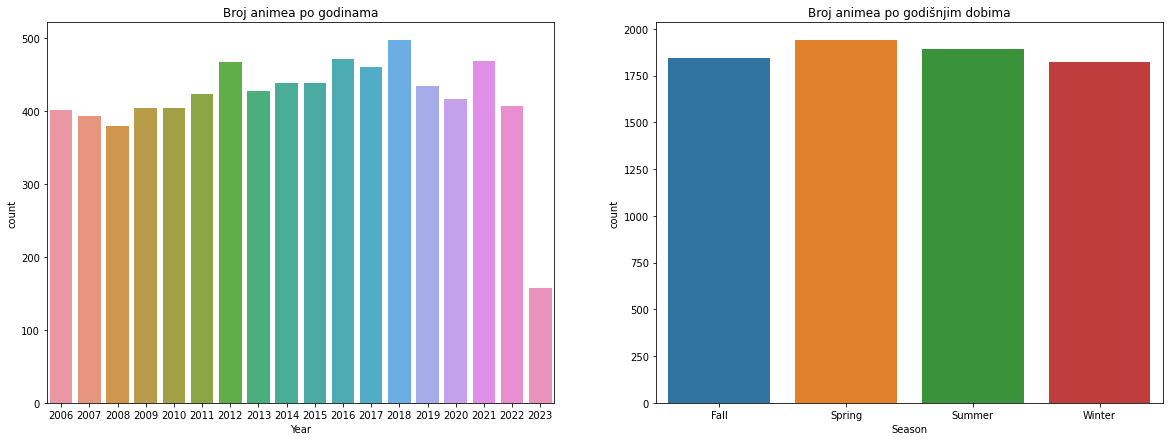

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.barplot(df['Year'], ax = axes[0])
sns.countplot(df['Season'], ax = axes[1])
axes[0].set_title("Number of anime by years")
axes[1].set_title("Number of anime by seasons");

We can notice that we have approximately an equal number of Anime both by seasons and by the year they were released. The reason for this is that we obtained the data from a website for Anime top lists. We can also observe that the number of Anime in the year 2023 is lower, but that is because not all the data for that year are available yet.

In [ ]:
format_count=pd.crosstab(index=df['Format'], columns='count')
format_count

col_0     count
Format         
Movie      1022
Music         2
ONA         762
OVA         780
Special     823
TV         3159
TV Short    945

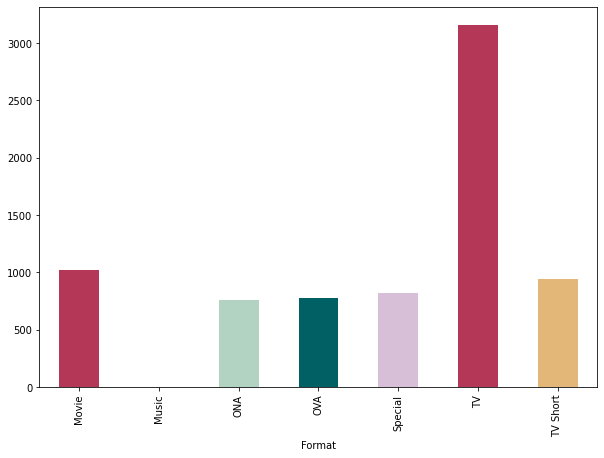

In [ ]:
format_count.plot(kind="bar", figsize=(10, 7), color={'count': ['#B43757', '#E3B778', '#B2D3C2', '#016064', '#D8BFD8']}, legend=False);

In [ ]:
#df.groupby('Year').Format.value_counts()
format_in_year = pd.crosstab(df['Year'], df['Format'])
format_in_year

Format  Movie  Music  ONA  OVA  Special   TV  TV Short
Year                                                  
2006       38      0   11   52       47  224        30
2007       49      1   11   48       57  202        26
2008       32      0   19   50       70  173        35
2009       52      0   29   53       86  150        34
2010       56      0   24   79       80  130        35
2011       62      1   22   70       71  140        57
2012       58      0   39   78       80  165        48
2013       56      0   29   51       57  170        65
2014       62      0   17   50       37  201        71
2015       68      0   23   43       46  183        76
2016       81      0   21   39       42  193        96
2017       81      0   44   31       29  191        84
2018       65      0   72   37       32  222        69
2019       75      0   69   31       24  181        55
2020       49      0  107   26       14  156        64
2021       70      0  119   22       17  194        47
2022       47      0   93   15       30  178        44
2023       21      0   13    5        4  106         9

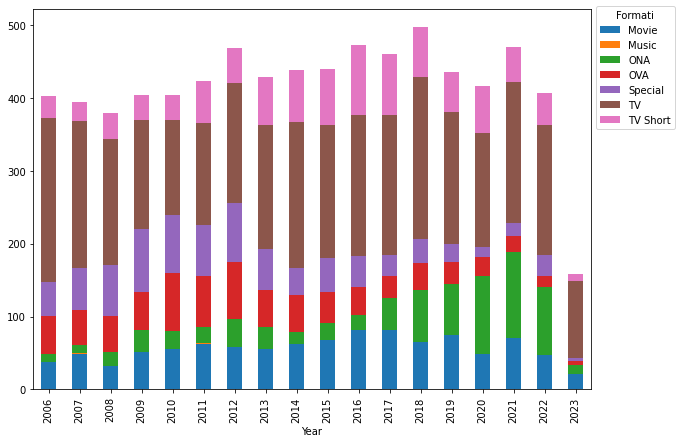

In [ ]:
plot = format_in_year.plot(kind="bar",stacked=True,figsize=(10, 7))
plot.legend(title='Formats', bbox_to_anchor=(1, 1.02),
         loc='upper left');

We can notice that there are the most Anime in the TV format, the least in the music format, and approximately equal numbers of others. Likewise, we can observe that the ratios of the number of Anime formats released are similar across the years.

In [ ]:
status_count = pd.crosstab(index=df['Status'], columns='count')
status_count

col_0             count
Status                 
Finished           7263
Not Yet Released     88
Releasing           142

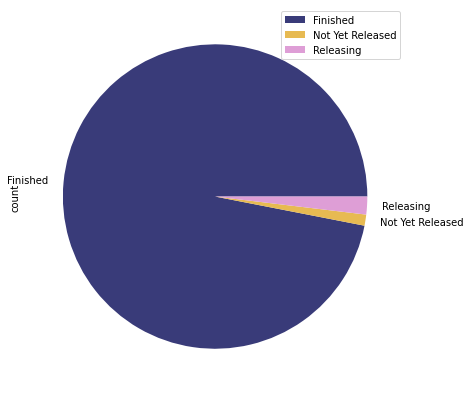

In [ ]:
status_count.plot(kind='pie', y='count', figsize=(7, 7), colormap='tab20b');

In [ ]:
status_in_year = pd.crosstab(df['Year'], df['Status'])
status_in_year

Status  Finished  Not Yet Released  Releasing
Year                                         
2006         402                 0          0
2007         394                 0          0
2008         379                 0          0
2009         404                 0          0
2010         402                 0          2
2011         421                 0          2
2012         466                 0          2
2013         427                 0          1
2014         437                 0          1
2015         439                 0          0
2016         471                 0          1
2017         458                 0          2
2018         493                 0          4
2019         434                 0          1
2020         410                 0          6
2021         458                 0         11
2022         365                 0         42
2023           3                88         67

In [ ]:
plot = status_in_year.plot(kind="bar",stacked=True,figsize=(10, 7))
plot.legend(title='Status', bbox_to_anchor=(1, 1.02),
         loc='upper left');

Most Anime have the status "completed." For those Anime released before 2023 with a different status, it is likely that the status was forgotten to be updated, and since 2023 has just begun, it is expected to have slightly different conditions there.

### 2. Which was the most popular Anime in which year?

In [ ]:
#popularity by number of interactions
pop_year=df.loc[df.groupby('Year')['Popularity'].idxmax()]
pop_year.reset_index(inplace=True)
pop_year[['Year','Title','Popularity']]

Year                                          Title  Popularity
0   2006                                     DEATH NOTE    586966.0
1   2007                                     DEATH NOTE    586966.0
2   2008                                      Toradora!    359682.0
3   2009  Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST    455071.0
4   2010                                   Angel Beats!    305719.0
5   2011                           HUNTER×HUNTER (2011)    529852.0
6   2012                           HUNTER×HUNTER (2011)    529852.0
7   2013                             Shingeki no Kyojin    643352.0
8   2014                                    Tokyo Ghoul    472950.0
9   2015                                  One Punch Man    488758.0
10  2016                          Boku no Hero Academia    569752.0
11  2017                           Shingeki no Kyojin 2    460159.0
12  2018                           Shingeki no Kyojin 3    424984.0
13  2019                               Kimetsu no Yaiba    599457.0
14  2020                                 Jujutsu Kaisen    520662.0
15  2021                                 Jujutsu Kaisen    520662.0
16  2022                                     SPY×FAMILY    268902.0
17  2023                                      Blue Lock    113777.0

In [ ]:
from textwrap import wrap
pop_year['YearTitle'] = pop_year['Year'].apply(str)+pop_year['Title']
pop_year['YearTitle']= ['\n'.join(wrap(x, 8)) for x in  pop_year['YearTitle']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_year['YearTitle'], pop_year['Popularity'], color='#B43757')
ax.set_title('Maximum Popularity for Anime by Year')
plt.show();

In [ ]:
#popularity by average rating
pop_year=df.loc[df.groupby('Year')['MeanScore'].idxmax()]
pop_year.reset_index(inplace=True)
pop_year[['Year','Title','MeanScore']]

Year                                          Title  MeanScore
0   2006                                       Mushishi       85.0
1   2007                     Tengen Toppa Gurren Lagann       85.0
2   2008                           CLANNAD: After Story       87.0
3   2009  Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST       90.0
4   2010                  Suzumiya Haruhi no Shoushitsu       86.0
5   2011                                    Steins;Gate       89.0
6   2012                           HUNTER×HUNTER (2011)       89.0
7   2013               Monogatari Series: Second Season       88.0
8   2014                             Mushishi Zoku Shou       86.0
9   2015                                       Gintama°       91.0
10  2016                                 Koe no Katachi       88.0
11  2017                           Owarimonogatari (Ge)       89.0
12  2018                              3-gatsu no Lion 2       89.0
13  2019                    Shingeki no Kyojin 3 Part 2       90.0
14  2020                        Violet Evergarden Movie       88.0
15  2021                             Gintama: THE FINAL       91.0
16  2022     Kaguya-sama wa Kokurasetai: Ultra Romantic       90.0
17  2023                          VINLAND SAGA SEASON 2       87.0

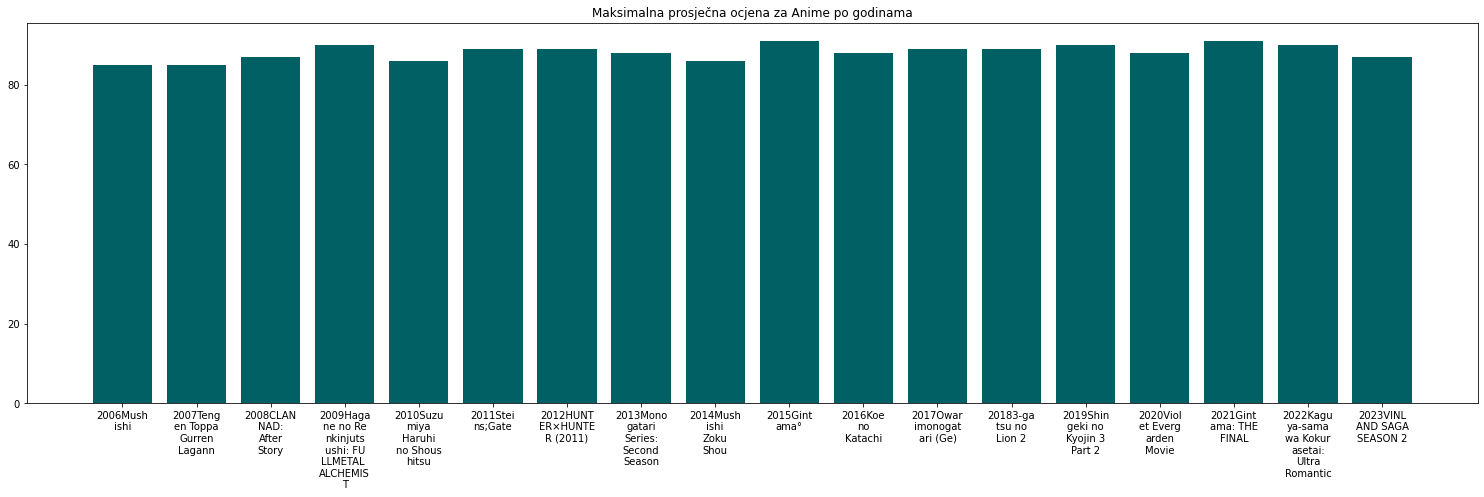

In [ ]:
pop_year['YearTitle'] = pop_year['Year'].apply(str)+pop_year['Title']
pop_year['YearTitle']= ['\n'.join(wrap(x, 8)) for x in  pop_year['YearTitle']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_year['YearTitle'], pop_year['MeanScore'], color='#016064')
ax.set_title('Maximum average rating for Anime by year')
plt.show();

In [ ]:
#popularity by the number of people who put people as favorites
pop_year=df.loc[df.groupby('Year')['Favorites'].idxmax()]
pop_year.reset_index(inplace=True)
pop_year[['Year','Title','Favorites']]

Year                                          Title  Favorites
0   2006                                     DEATH NOTE    35137.0
1   2007                                     DEATH NOTE    35137.0
2   2008                                      Toradora!    13586.0
3   2009  Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST    41989.0
4   2010                                   Angel Beats!     8991.0
5   2011                           HUNTER×HUNTER (2011)    56743.0
6   2012                           HUNTER×HUNTER (2011)    56743.0
7   2013                             Shingeki no Kyojin    44216.0
8   2014                                      Haikyuu!!    23803.0
9   2015                        Shigatsu wa Kimi no Uso    21633.0
10  2016                                 Koe no Katachi    34801.0
11  2017                                   Black Clover    18246.0
12  2018                              Violet Evergarden    23153.0
13  2019                               Kimetsu no Yaiba    38893.0
14  2020                                 Jujutsu Kaisen    42452.0
15  2021                                 Jujutsu Kaisen    42452.0
16  2022                                     SPY×FAMILY    19579.0
17  2023                                      Blue Lock     4416.0

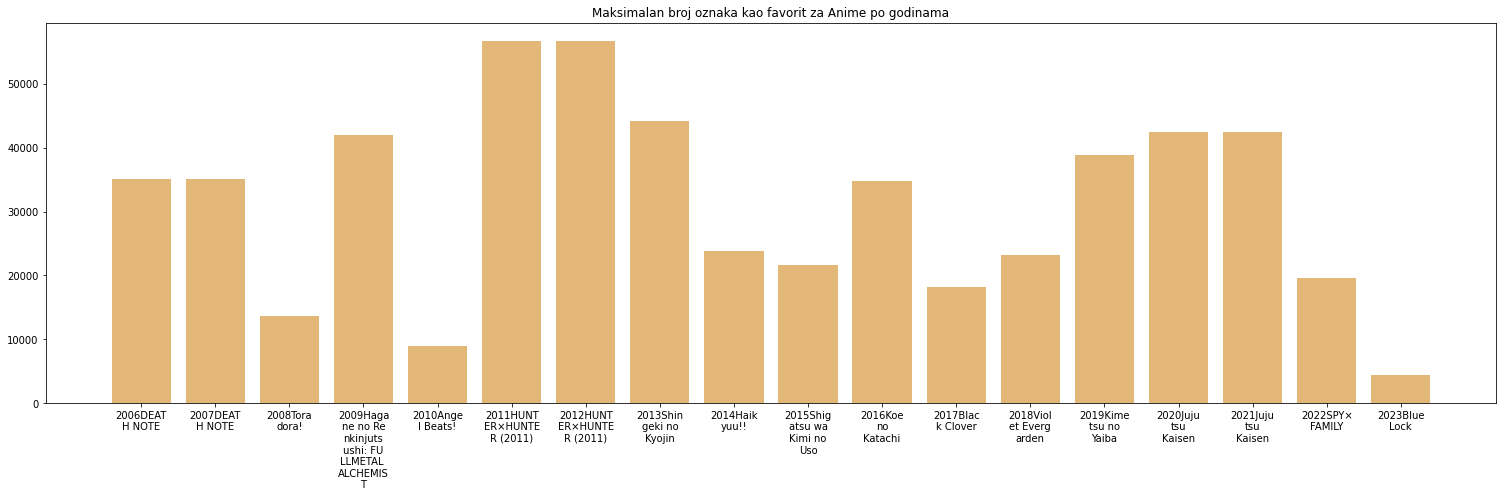

In [ ]:
pop_year['YearTitle'] = pop_year['Year'].apply(str)+pop_year['Title']
pop_year['YearTitle']= ['\n'.join(wrap(x, 8)) for x in  pop_year['YearTitle']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_year['YearTitle'], pop_year['Favorites'], color='#E3B778' )
ax.set_title('Maximum Favorites for Anime by Year')
plt.show();

From the graphs shown above, we can see that depending on which measure we take for popularity, we will get different graphs. However, if we compare the titles by favorites and popularity, we can notice that some names still repeat.

### 3. Production houses

#### 3.1. Which production company is generally the most active?

In [ ]:
max_active_studio=df['Studios'].value_counts().idxmax()
max_active=df['Studios'].value_counts().agg('max')

print(f'In general, the most active production company is: {max_active_studio}, and in total it produced: {max_active} anime.')

Općenito najaktivnija produkcijska kuća je: J.C. Staff, a sveukupno je proizvela: 221 animea.


In [ ]:
#10 of the most active production houses
active = df['Studios'].value_counts().nlargest(n=10)
active = pd.DataFrame(active)
active

Studios
J.C. Staff             221
Toei Animation         207
Sunrise                195
Production I.G         184
A-1 Pictures           183
Studio DEEN            181
MADHOUSE               179
OLM                    178
TMS Entertainment      168
bones                  122

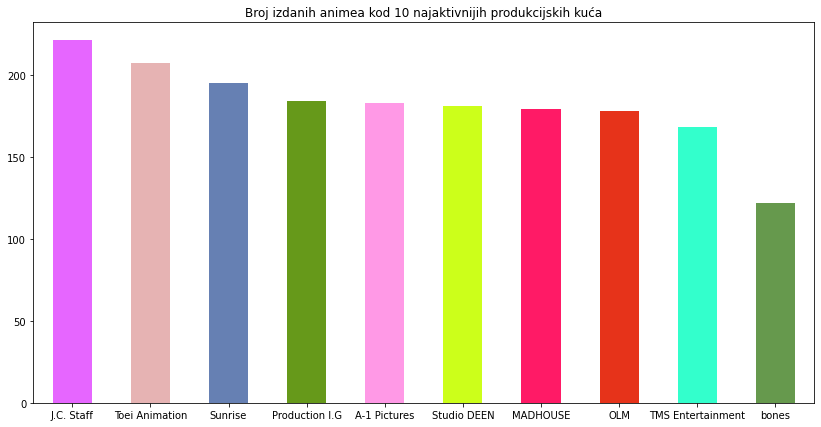

In [ ]:
active.plot(kind='bar', figsize=(14, 7),
            title="The number of anime released by the 10 most active production houses",
            rot=0, color={'Studios': ['#E666FF', '#E6B3B3',
                                      '#6680B3', '#66991A',
                                      '#FF99E6', '#CCFF1A',
                                      '#FF1A66', '#E6331A',
                                      '#33FFCC', '#66994D']},legend=False);

#### 3.2. Which production company was the most active in which year?

In [ ]:
#how many animes were released by which production company in which year
pd.crosstab(df['Year'], df['Studios'], margins= True)

Studios  10GAUGE  33 Collective  5 Inc.  8-bit  A-1 Pictures  A-Real  \
Year                                                                   
2006           0              0       0      0             2       0   
2007           0              0       0      0             2       0   
2008           0              0       0      0             6       0   
2009           0              0       0      0             6       0   
2010           0              0       0      0            10       0   
2011           0              0       0      2             8       0   
2012           0              0       0      1            12       0   
2013           0              0       0      6            15       0   
2014           1              0       0      4            24       0   
2015           1              0       0      6            21       1   
2016           0              0       0      4            19       0   
2017           1              0       0      4            14       0   
2018           1              2       0      3            11       0   
2019           0              0       0      4             8       0   
2020           0              0       0      3             8       0   
2021           0              0       0      3             5       0   
2022           0              0       0      4             9       1   
2023           0              0       1      1             3       0   
All            4              2       1     45           183       2   

Studios  A.C.G.T.  AIC  AIC A.S.T.A.  AIC Build  AIC Frontier  AIC Plus+  \
Year                                                                       
2006            0    2             0          0             0          0   
2007            5    0             1          0             0          0   
2008            3    1             2          0             0          0   
2009            0    4             2          0             0          1   
2010            0    6             2          1             0          2   
2011            1    5             2          3             0          2   
2012            0    5             3          1             1          0   
2013            0    2             3          2             2          2   
2014            0    0             0          0             0          3   
2015            0    0             0          0             0          1   
2016            0    0             0          0             0          0   
2017            1    0             0          0             0          0   
2018            1    0             0          0             0          0   
2019            0    0             0          0             0          0   
2020            0    1             0          0             0          0   
2021            0    0             0          0             0          0   
2022            2    0             0          0             0          0   
2023            0    0             0          0             0          0   
All            13   26            15          7             3         11   

Studios  AIC Spirits  ALBACROW  APPP  AQUA ARIS  AXsiZ  Acca effe  Actas  \
Year                                                                       
2006               0         0     1          0      0          0      0   
2007               1         0     2          0      0          0      1   
2008               2         0     0          0      0          0      1   
2009               2         0     0          0      0          0      0   
2010               1         0     0          0      0          0      2   
2011               1         0     0          0      0          0      0   
2012               0         0     0          0      0          0      2   
2013               0         0     0          0      0          0      1   
2014               0         0     0          0      0          0      1   
2015               0         0     0          0      0

In [ ]:
# in which year, which production house released the most anime
n_anime_studios=pd.DataFrame(df.groupby(['Year']).apply(lambda x: x['Studios'].value_counts().index[0]))
n_anime_studios = pd.concat([n_anime_studios,df.groupby(['Year']).apply(lambda x: x['Studios'].value_counts().max())], axis=1).reset_index()
n_anime_studios.columns=['Year', 'Studios', 'nAnime']
n_anime_studios

Year       Studios  nAnime
0   2006      MADHOUSE      21
1   2007      MADHOUSE      20
2   2008      MADHOUSE      21
3   2009      MADHOUSE      20
4   2010    J.C. Staff      17
5   2011         bones      14
6   2012       Sunrise      19
7   2013       Sunrise      19
8   2014  A-1 Pictures      24
9   2015  A-1 Pictures      21
10  2016  A-1 Pictures      19
11  2017           OLM      17
12  2018           OLM      20
13  2019    J.C. Staff      18
14  2020     AQUA ARIS      21
15  2021    J.C. Staff      18
16  2022     AQUA ARIS      14
17  2023    J.C. Staff       6

In [ ]:
n_anime_studios['YearStudios'] = n_anime_studios['Year'].apply(str)+n_anime_studios['Studios']
n_anime_studios['YearStudios']= ['\n'.join(wrap(x, 8)) for x in  n_anime_studios['YearStudios']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(n_anime_studios['YearStudios'], n_anime_studios['nAnime'], color='#985f99')
ax.set_title('Highest number of Anime released by production company in each year')
plt.show();

#### 3.3. Which production company has the most popular Anime (top 10 most popular anime)?

In [ ]:
#most popular anime
pop_anime_studios=df.groupby('Studios').apply(lambda x: x.Popularity.sum()).reset_index()
pop_anime_studios.rename(columns={0:'Popularity'}, inplace=True )
pop_anime_studios_st=pop_anime_studios.loc[pop_anime_studios.Popularity.idxmax()].Studios
pop_anime_studios_pop=pop_anime_studios.loc[pop_anime_studios.Popularity.idxmax()].Popularity
print(f'The most popular studio is {pop_anime_studios_st} with a popularity of {pop_anime_studios_pop} which is {pop_anime_studios_pop/pop_anime_studios.Popularity.sum().round(3)} %')

Najpopularniji studio je A-1 Pictures s popularnošću od 12520523.0 što ćini 0.07288801775175228 %


In [ ]:
# 10 most popular anime studios
popular_studios = df.groupby('Studios').apply(lambda x: x.Popularity.sum()).nlargest(n=10).reset_index()
popular_studios.rename(columns={0:'Popularity'}, inplace=True )
popular_studios

Studios  Popularity
0     A-1 Pictures  12520523.0
1            bones  10559598.0
2       J.C. Staff  10193354.0
3         MADHOUSE   9677081.0
4   Production I.G   6823882.0
5  Kyoto Animation   6378455.0
6            MAPPA   5443557.0
7       Wit Studio   5437544.0
8   Studio Pierrot   4544392.0
9        White Fox   4434071.0

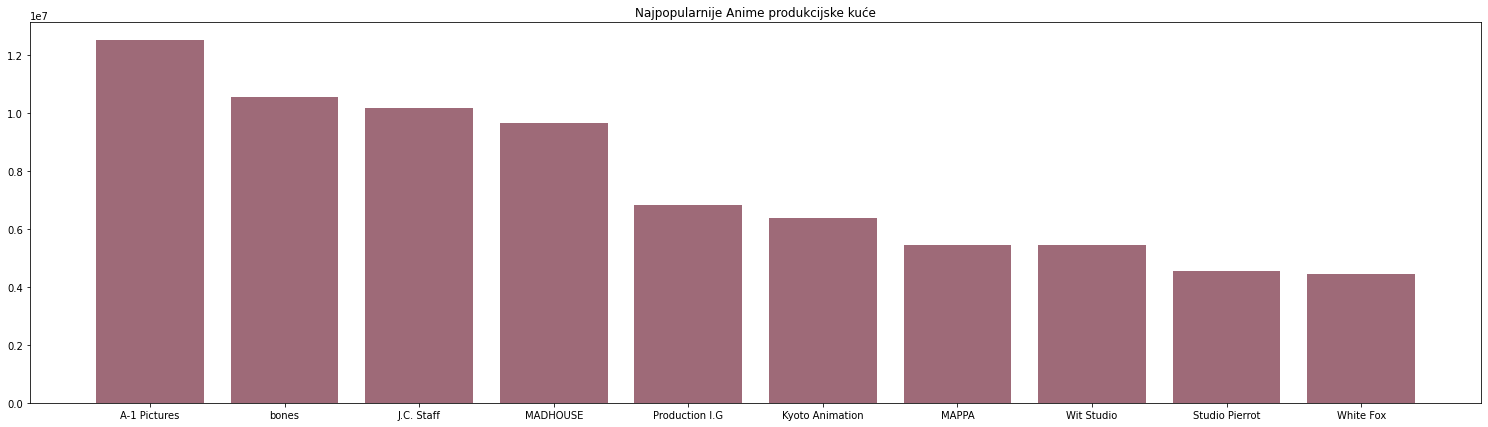

In [ ]:
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(popular_studios['Studios'], popular_studios['Popularity'], color='#9e6a78')
ax.set_title('Most Popular Anime Production Companies')
plt.show();

#### 3.4. Which production company was the most popular in which year?

In [ ]:
#most popular studio every year
pop_studio_year=df.groupby(['Year', 'Studios']).apply(lambda x: x.Popularity.sum()).reset_index()
pop_studio_year.rename(columns={0:'Popularity'}, inplace=True)
pop_studio_year=pop_studio_year.loc[pop_studio_year.groupby('Year').Popularity.idxmax()]
pop_studio_year

Year       Studios  Popularity
21    2006      MADHOUSE   1456638.0
92    2007      MADHOUSE    917535.0
146   2008    J.C. Staff    679596.0
253   2009         bones   1047910.0
282   2010    J.C. Staff    800484.0
332   2011  A-1 Pictures   1028675.0
406   2012  A-1 Pictures   1360720.0
572   2013    Wit Studio   1412445.0
582   2014  A-1 Pictures   2052749.0
727   2015      MADHOUSE   1519290.0
895   2016         bones   1472103.0
1015  2017         bones   1063989.0
1159  2018         bones   1090128.0
1318  2019      ufotable   1279703.0
1387  2020         MAPPA    897687.0
1535  2021         MAPPA   1224362.0
1649  2022   CloverWorks    616350.0
1820  2023         MAPPA    252513.0

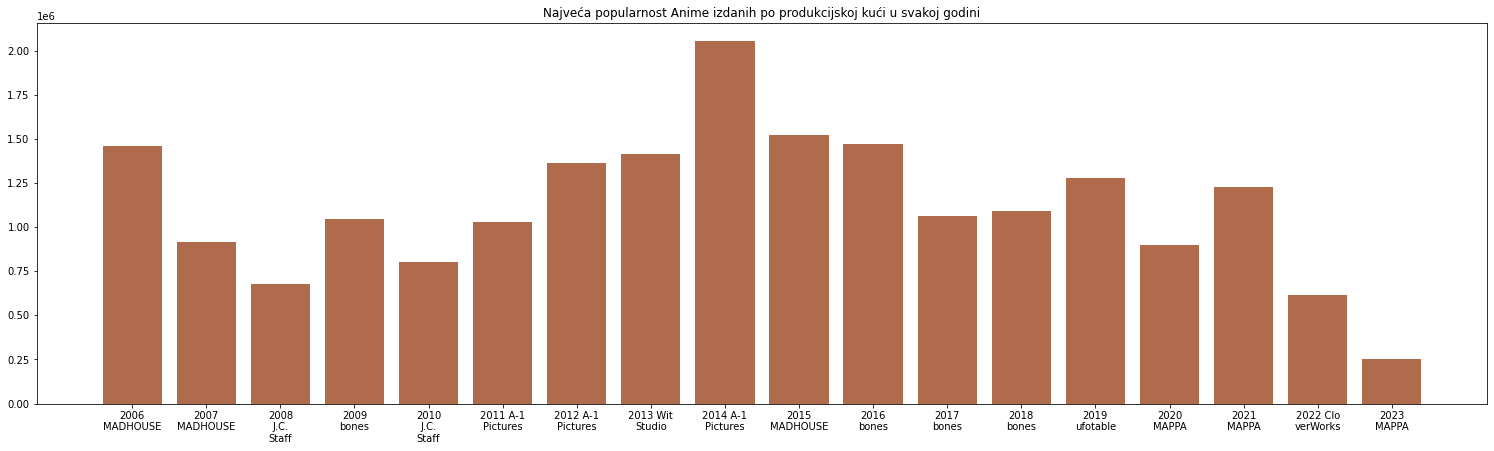

In [ ]:
pop_studio_year['YearStudios'] = pop_studio_year['Year'].apply(str)+' '+pop_studio_year['Studios'].astype('object')
pop_studio_year['YearStudios']= ['\n'.join(wrap(x, 8)) for x in  pop_studio_year['YearStudios']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_studio_year['YearStudios'], pop_studio_year['Popularity'], color='#b06b4c')
ax.set_title('The most popular Anime released by production company in each year')
plt.show();

#### 3.5. Which production company makes TV anime with the highest number of episodes on average?

In [ ]:
mean_st_ep = df[df['Format'] == 'TV'].groupby('Studios')['Episodes'].mean().reset_index()
mean_st_ep = mean_st_ep.loc[mean_st_ep['Episodes'].idxmax()]
print(f'The studio that makes TV anime with the longest episodes is {mean_st_ep.Studios}, and the average duration is: {mean_st_ep.Episodes}')
# mean_st_ep

Studio koji radi TV anime koji imaju najduže epizode je Tomason, a prosječno vrijeme trajanja je: 125.6


In [ ]:
mean_st_ep = df[df['Format'] == 'TV'].groupby('Studios').apply(lambda x: (x['Episodes']*x['EpisodeDuration']).mean()).reset_index()
mean_st_ep.rename(columns={0:'Mean'}, inplace=True )
mean_st_ep = mean_st_ep.loc[mean_st_ep['Mean'].idxmax()]
print(f'The studio that makes the TV anime that has the longest anime on average is {mean_st_ep.Studios}, and the average total running time is: {mean_st_ep.Mean}')
# mean_st_ep

Studio koji radi TV anime koji u prosjeku ima najduži anime Tomason, a prosječno ukupno vrijeme trajanja je: 2972.0


#### 3.6. What is the most common inspiration of the 10 most popular production houses and in what format?

In [ ]:
list_studios=popular_studios.Studios.tolist()
popular_studio_all = df[df['Studios'].isin(list_studios)]
inspo_studio=pd.crosstab(popular_studio_all['Studios'], popular_studio_all['Source'])
pd.crosstab(popular_studio_all['Studios'], popular_studio_all['Source'], margins=True)

Source           Anime  Comic  Light Novel  Live Action  Manga  \
Studios                                                          
A-1 Pictures         0      0           36            0     70   
J.C. Staff           0      0           60            0    110   
Kyoto Animation      0      0           40            0     24   
MADHOUSE             0      6           27            2     88   
MAPPA                0      0            1            2     40   
Production I.G       2      0            3            0     96   
Studio Pierrot       0      0            2            0     58   
White Fox            0      0           12            0     11   
Wit Studio           0      0            1            0     39   
bones                0      1            5            0     64   
All                  2      7          187            4    600   

Source           Multimedia Project  Novel  Original  Other  Video Game  \
Studios                                                                   
A-1 Pictures                      1      4        31      5          29   
J.C. Staff                        0      0        16     16           9   
Kyoto Animation                   0      7        20      1           0   
MADHOUSE                          1      9        19     17           4   
MAPPA                             0      0        14      6           5   
Production I.G                    0     15        42      3          12   
Studio Pierrot                    0      0        18      1           7   
White Fox                         0      0         6      0           0   
Wit Studio                        0      1        16      0           1   
bones                             0      5        43      0           3   
All                               2     41       225     49          70   

Source           Visual Novel   All  
Studios                              
A-1 Pictures                7   183  
J.C. Staff                  8   219  
Kyoto Animation             8   100  
MADHOUSE                    3   176  
MAPPA                       0    68  
Production I.G              2   175  
Studio Pierrot              0    86  
White Fox                  12    41  
Wit Studio                  0    58  
bones                       0   121  
All                        40  1227

In [ ]:
inspo_studio.plot(kind='bar',figsize=(20, 7), title='The most common inspiration for production companies', rot=0)
plot.legend(title='Source', bbox_to_anchor=(1, 1.02),
         loc='upper right');

In [ ]:
pd.crosstab(popular_studio_all['Source'], [popular_studio_all['Studios'], popular_studio_all['Format']], margins=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/pivot.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agged[v] = maybe_downcast_to_dtype(agged[v], data[v].dtype)


Studios            A-1 Pictures                               J.C. Staff      \
Format                    Movie ONA OVA Special   TV TV Short      Movie ONA   
Source                                                                         
Anime                         0   0   0       0    0        0          0   0   
Comic                         0   0   0       0    0        0          0   0   
Light Novel                   2   1   1       6   26        0          3   0   
Live Action                   0   0   0       0    0        0          0   0   
Manga                         7   1   7       5   50        0          2   7   
Multimedia Project            0   0   0       0    1        0          0   0   
Novel                         1   0   0       0    3        0          0   0   
Original                      7   1   1       3   17        2          5   0   
Other                         0   0   1       0    4        0          0   0   
Video Game                    6   2   3       5   13        0          0   1   
Visual Novel                  0   0   0       1    6        0          1   0   
All                          23   5  13      20  120        2         11   8   

Studios                                      Kyoto Animation                  \
Format             OVA Special   TV TV Short           Movie ONA OVA Special   
Source                                                                         
Anime                0       0    0        0               0   0   0       0   
Comic                0       0    0        0               0   0   0       0   
Light Novel          7       1   49        0               8   3   8       7   
Live Action          0       0    0        0               0   0   0       0   
Manga               16      10   73        2               2   4   8       1   
Multimedia Project   0       0    0        0               0   0   0       0   
Novel                0       0    0        0               4   0   1       0   
Original             1       0   10        0               7   0   4       5   
Other                1       2   12        1               0   0   0       1   
Video Game           0       1    7        0               0   0   0       0   
Visual Novel         1       1    5        0               0   0   2       0   
All                 26      15  156        3              21   7  23      14   

Studios                MADHOUSE                           MAPPA          \
Format              TV    Movie OVA Special   TV TV Short Movie ONA OVA   
Source                                                                    
Anime                0        0   0       0    0        0     0   0   0   
Comic                0        1   1       0    4        0     0   0   0   
Light Novel         14        4   1       2   20        0     0   0   0   
Live Action          0        0   2       0    0        0     0   0   0   
Manga                9        6   8       3   68        3     3   1   2   
Multimedia Project   0        0   0       0    1        0     0   0   0   
Novel                2        4   0       2    3        0     0   0   0   
Original             4        6   0       0   13        0     0   1   0   
Other                0        2   0       2   11        2     1   1   0   
Video Game           0        0   0       0    4        0     0   0   0   
Visual Novel         6        0   0       0    3        0     0   0   0   
All                 35       23  12       9  127        5     4   3   2   

Studios                                 Production I.G                      \
Format             Special  TV TV Short          Movie ONA OVA Special  TV   
Source                                                                       
Anime                    0   0        0              0   0   0       0   2   
Comic                    0   0        0              0   0   0       0   0   
Light Novel              0   1        0              1   0   1       0   1   
Live

### 4. What is the most common genre? What is the most popular genre? How has the popularity of genres changed over the years?

In [ ]:
# vount genre
df2['Genre'].value_counts().reset_index()

index  Genre
0          Comedy   3707
1          Action   2405
2         Fantasy   1782
3   Slice of Life   1483
4           Drama   1446
5       Adventure   1329
6          Sci-Fi   1197
7         Romance   1190
8    Supernatural   1041
9           Ecchi    593
10        Mystery    545
11          Mecha    455
12          Music    442
13         Sports    434
14  Psychological    333
15   Mahou Shoujo    247
16         Horror    226
17       Thriller    158

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(df2['Genre'])
ax.set_title("Frequencies of Anime genres");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


We can notice that comedy is the most common genre for Anime.

In [ ]:
genre_popularity = df2.groupby('Genre').apply(lambda x: x.Popularity.sum()).reset_index()
genre_popularity.rename(columns={0:'Popularity'}, inplace=True)
genre_popularity

Genre  Popularity
0          Action  89531353.0
1       Adventure  45804652.0
2          Comedy  83986092.0
3           Drama  71825011.0
4           Ecchi  18819649.0
5         Fantasy  56799550.0
6          Horror   9769435.0
7    Mahou Shoujo   1936515.0
8           Mecha   7125353.0
9           Music   5557199.0
10        Mystery  27221595.0
11  Psychological  25439410.0
12        Romance  49856925.0
13         Sci-Fi  29682252.0
14  Slice of Life  41137126.0
15         Sports   8763728.0
16   Supernatural  50322502.0
17       Thriller  13528271.0

In [ ]:
colors=['#3366CC','#DC3912','#FF9900','#109618',
        '#990099','#3B3EAC','#0099C6','#DD4477',
        '#66AA00','#B82E2E','#316395','#994499',
        '#22AA99','#AAAA11','#6633CC','#E67300',
        '#8B0707', '#329262']

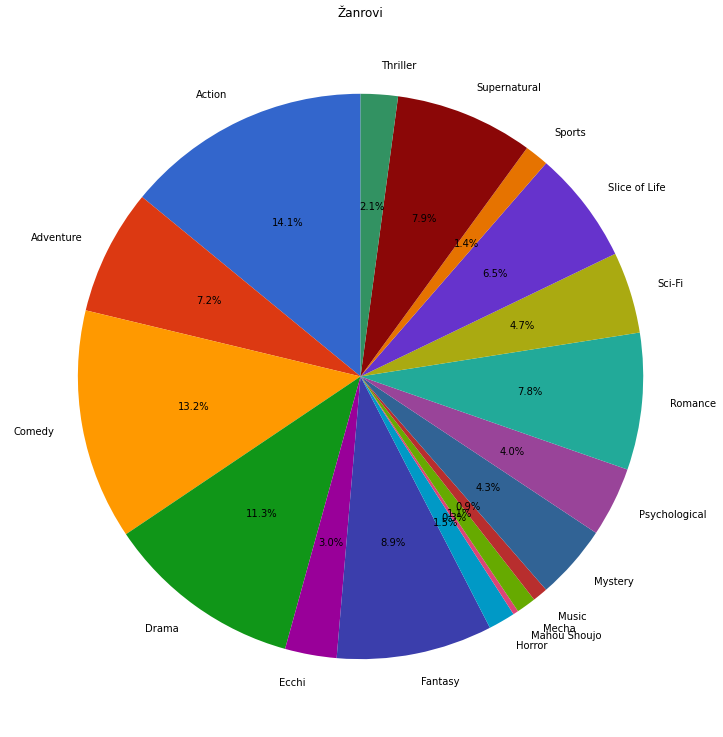

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))
ax.pie(genre_popularity['Popularity'], labels=genre_popularity['Genre'], colors=colors, startangle = 90, autopct='%1.1f%%')
ax.set_title('Genres');

From the pie chart we can conclude that the most popular genre is "Action".

In [ ]:
pd.crosstab(df2['Year'], df2['Genre'], margins= True)

Genre  Action  Adventure  Comedy  Drama  Ecchi  Fantasy  Horror  Mahou Shoujo  \
Year                                                                            
2006      105        106     196    113     26      110      22            16   
2007      124         88     182    108     27      114      19            13   
2008      134         66     192     68     37       81      13            10   
2009      115         78     214     67     41       76       8             9   
2010      115         59     230     57     46       70       9            13   
2011      140         53     225     64     48       70      10            15   
2012      147         78     229     76     42       86      21            14   
2013      127         50     221     70     41       97       6            15   
2014      142         73     223     60     41      110       8            15   
2015      158         63     225     76     53       91       9            17   
2016      171         71     229     95     38      115      17            18   
2017      146         72     213     99     25      128      15            21   
2018      188         81     227    107     27      106      22            14   
2019      156         98     225    100     36      123      11            14   
2020      121         81     219     82     25      109       9            10   
2021      148         90     195    102     21      130      12            18   
2022      116         81     196     74     15      105      10            11   
2023       52         41      66     28      4       61       5             4   
All      2405       1329    3707   1446    593     1782     226           247   

Genre  Mecha  Music  Mystery  Psychological  Romance  Sci-Fi  Slice of Life  \
Year                                                                          
2006      35      7       31             23      100      83             46   
2007      46     11       34             17       81      75             40   
2008      21      8       33             17       74      82             43   
2009      27     14       25             16       69      70             56   
2010      24     13       25             10       58      63             52   
2011      24     13       28             15       64      57             62   
2012      25     16       33             17       93      73             81   
2013      34     18       27             14       76      52             88   
2014      30     24       30             28       74      60             89   
2015      26     38       29             16       68      68             98   
2016      25     41       35             17       62      71            104   
2017      22     42       37             22       62      72            112   
2018      33     30       31             27       71      83            136   
2019      22     37       37             24       58      84            114   
2020      15     37       29             15       41      58            107   
2021      29     46       36             27       51      79            122   
2022      12     35       32             25       52      49            102   
2023       5     12       13              3       36      18             31   
All      455    442      545            333     1190    1197           1483   

Genre  Sports  Supernatural  Thriller    All  
Year                                          
2006       13            55        10   1097  
2007       18            47         9   1053  
2008        9            54        13    955  
2009       24            40        12    961  
2010       18            57         7    926  
2011       21            78         8    995  
2012       27            57         7   1122  
2013       28            52         8   1024  
2014       30            63         7   1107  
2015       30            69         5   1139  
2016       30            69        10   1218  
2017       30            65

In [ ]:
year_genre=pd.DataFrame(df2.groupby(['Year']).apply(lambda x: x['Genre'].value_counts().index[0]))
pd.concat([year_genre, df2.groupby(['Year']).apply(lambda x: x['Genre'].value_counts().max())], axis=1)

0    0
Year             
2006  Comedy  196
2007  Comedy  182
2008  Comedy  192
2009  Comedy  214
2010  Comedy  230
2011  Comedy  225
2012  Comedy  229
2013  Comedy  221
2014  Comedy  223
2015  Comedy  225
2016  Comedy  229
2017  Comedy  213
2018  Comedy  227
2019  Comedy  225
2020  Comedy  219
2021  Comedy  195
2022  Comedy  196
2023  Comedy   66

### 5. Does the number of episodes and the length of episodes change over time? How is the duration of the episode and the number of episodes moving by format?

In [ ]:
ep_in_time=df.groupby('Year')[['Episodes', 'EpisodeDuration']].mean().reset_index()
ep_in_time

Year   Episodes  EpisodeDuration
0   2006  21.947761        23.398352
1   2007  19.302030        22.973913
2   2008  18.226913        20.919308
3   2009  17.235149        18.968750
4   2010  13.336216        18.010109
5   2011  18.143154        17.214731
6   2012  15.236227        17.686041
7   2013  16.809059        18.049779
8   2014  18.210678        19.180210
9   2015  14.658314        18.098431
10  2016  19.075327        18.012788
11  2017  14.712075        17.572559
12  2018  15.752734        19.061384
13  2019  14.310982        18.303547
14  2020  16.804478        15.908209
15  2021  13.563954        16.704955
16  2022  11.384479        19.010740
17  2023  13.013060        20.159754

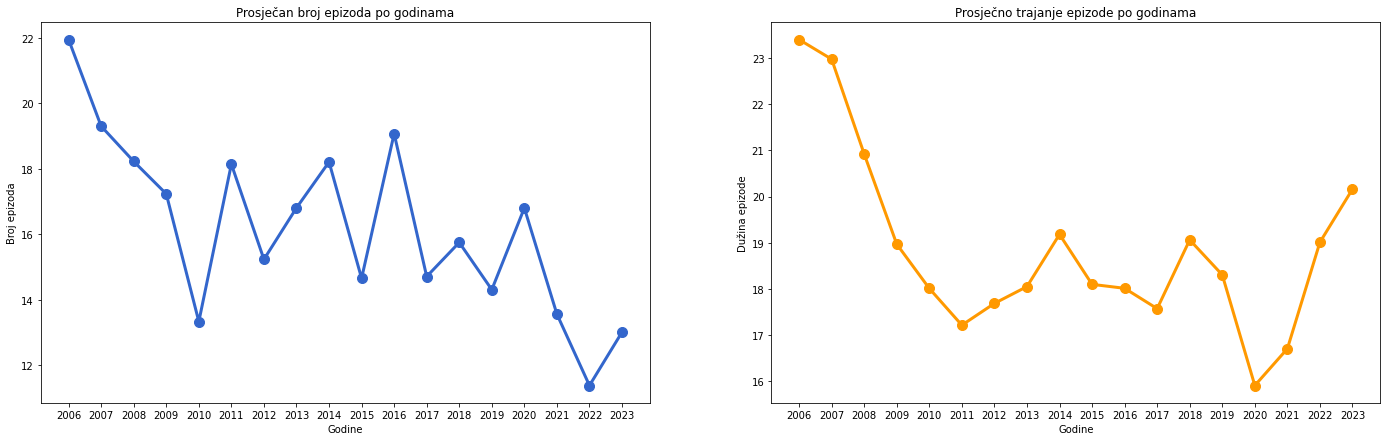

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24,7))
axes[0].plot(ep_in_time['Year'].apply(str), ep_in_time['Episodes'], linewidth=3.0, color=colors[0], marker='.', markersize=20);
axes[1].plot(ep_in_time['Year'].apply(str), ep_in_time['EpisodeDuration'], linewidth=3.0, color=colors[2], marker='.', markersize=20);
axes[0].set_title("Average number of episodes by year")
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Number of episodes')
axes[1].set_title("Average episode duration by years")
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Episode length');

From the graphs shown above, we can see that the average number of episodes has decreased in recent years, while the episode length has been decreasing for a while. The largest drop in average episode length is observed in 2020, but we also see an increase in the number of episodes. This is likely due to production companies wanting to "cater" to users by releasing episodes more frequently but shorter because everyone was mostly at home that year and had the opportunity to regularly follow series, movies, etc.

In [ ]:
ep_format=df.groupby('Format')[['Episodes', 'EpisodeDuration']].mean().reset_index()
ep_format.sort_values(by=['Episodes', 'EpisodeDuration'], ascending=False, inplace=True)
ep_format

Format   Episodes  EpisodeDuration
6  TV Short  30.648424         5.661745
5        TV  24.215789        23.725400
2       ONA  13.886018        10.010418
4   Special   3.550425        15.936611
3       OVA   2.427634        26.073833
0     Movie   1.081756              NaN
1     Music   1.000000         4.500000

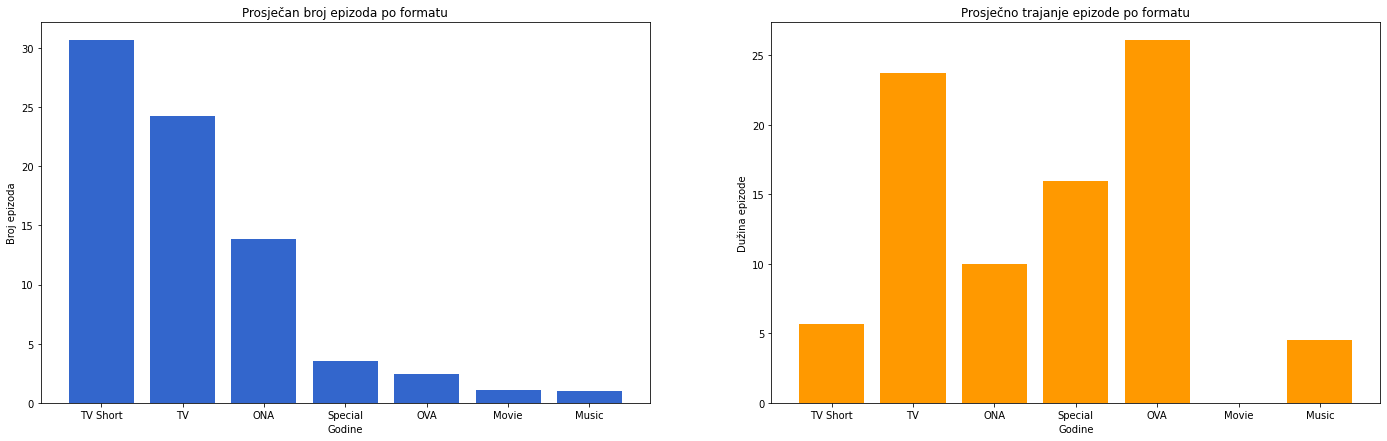

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24,7))
axes[0].bar(ep_format['Format'], ep_format['Episodes'], color=colors[0]);
axes[1].bar(ep_format['Format'].apply(str), ep_format['EpisodeDuration'], color=colors[2]);
axes[0].set_title("Average number of episodes per format")
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Number of episodes')
axes[1].set_title("Average episode duration by format")
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Episode length');

### 6. Which anime is the most watched right now? Which anime has the most users given up watching, which one has the most people finished watching?

In [ ]:
curr_pop = df.loc[df['Current'].idxmax()]
print(f'Currently most followed is {curr_pop.Title}, followed by {curr_pop.Current} people. Favorited by {curr_pop.Favorites} people.')

Trenutno se najviše prati Black Clover, a prati ga 78325.0 ljudi. Kao favorita označilo ga je 18246.0 ljudi.


In [ ]:
## remove duplicates
df3 = df
df3.drop_duplicates(subset=['Link'], keep='first', ignore_index=True, inplace=True)

In [ ]:
#20 most viewed right now
current_most = df3['Current'].nlargest(n=20).reset_index()
current_most.rename(columns={'index':'Position'}, inplace=True)
current_most
current_anime = df3.loc[current_most.Position]['Title'].reset_index()
current_anime = pd.concat([current_anime, current_most], axis=1).drop(['Position', 'index'], axis=1)
current_anime

Title  Current
0                                    Black Clover  78325.0
1                            HUNTER×HUNTER (2011)  75600.0
2                                    Chainsaw Man  71319.0
3                                  Jujutsu Kaisen  65660.0
4                         Boku no Hero Academia 5  54368.0
5                                 Tokyo Revengers  49725.0
6            Shingeki no Kyojin: The Final Season  49254.0
7                                Kimetsu no Yaiba  48122.0
8                               SPY×FAMILY Part 2  41534.0
9                                      SPY×FAMILY  41516.0
10                             Shingeki no Kyojin  37667.0
11                             Fumetsu no Anata e  35846.0
12    Shingeki no Kyojin: The Final Season Part 2  35803.0
13                             NARUTO: Shippuuden  35652.0
14                          Boku no Hero Academia  34472.0
15                                     DEATH NOTE  32998.0
16                                       Horimiya  32881.0
17                                        Gintama  30350.0
18                             Enen no Shouboutai  29939.0
19  Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST  29126.0

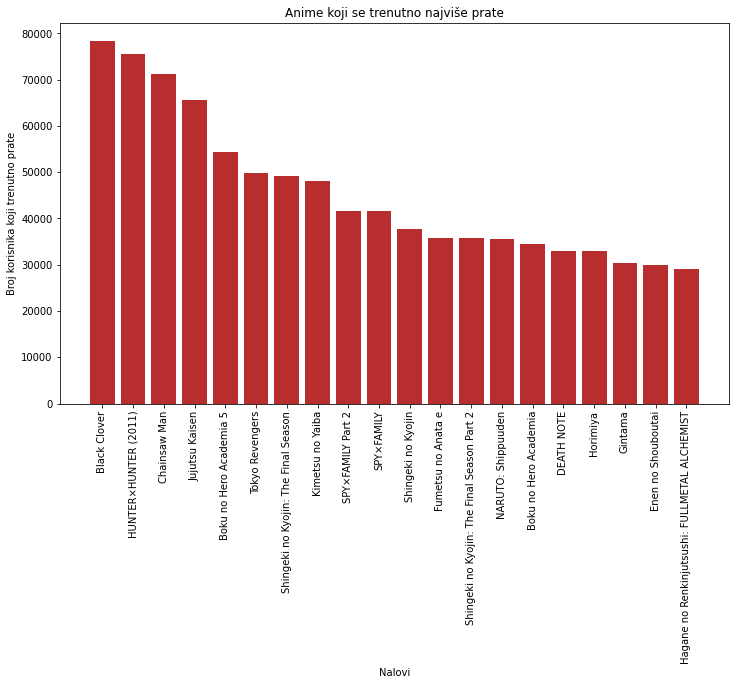

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(current_anime['Title'], current_anime['Current'], color=colors[9])
ax.set_title("The most watched anime right now")
ax.set_xlabel('Label')
ax.set_ylabel('Number of users currently following')
ax.tick_params(axis='x', labelrotation = 90);

In [ ]:
most_dropped = df.loc[(df['Dropped']/df['Popularity']).idxmax()]
percent_most_dropped = ((df['Dropped']/df['Popularity']).max())*100
print(f'The most dropped anime was {most_dropped.Title} and {round(percent_most_dropped, 2)}% of users gave up watching it.')

Najviše se odustajalo od animea Deluxe da yo! Kaishain i to 19.05% korisnika je odustalo od gledanja.


In [ ]:
#10 most dropped anime
indx_dropped = (round(df3['Dropped']/df3['Popularity']*100,2)).nlargest(n=10).reset_index()
indx_dropped.rename(columns={'index':'Position', 0: 'Percentage'}, inplace=True )
titles_dropped = df3.loc[indx_dropped.Position][['Title']].reset_index()
dropped_anime = pd.concat([titles_dropped, indx_dropped], axis=1).drop(['index', 'Position'], axis=1)
dropped_anime

Title  Percentage
0                             Deluxe da yo! Kaishain       19.05
1                                    BONOBONO (2016)       18.44
2                                  Human Bug Daigaku       17.92
3                                        Shadowverse       17.82
4                                   Chiisana Oji-san       17.65
5                                      BABY-HAMITANG       16.13
6  Seiken Densetsu: Legend of Mana - The Teardrop...       16.07
7                                Ore, Tsushima (ONA)       16.06
8                                 Digimon Adventure:       15.87
9                              Duel Masters King Max       15.82

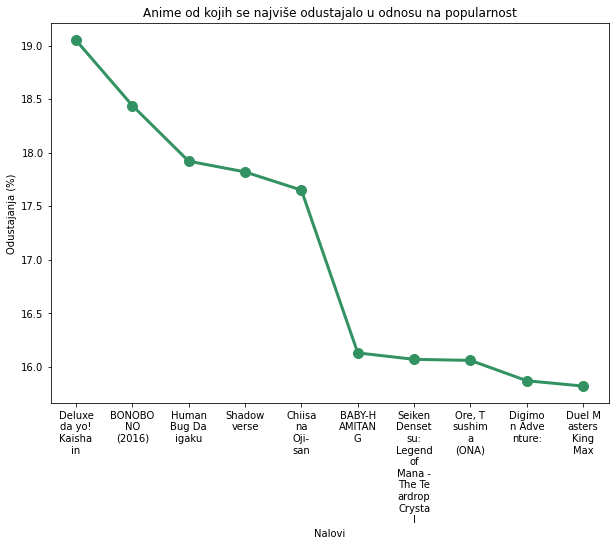

In [ ]:
dropped_anime['Title']= ['\n'.join(wrap(x, 6)) for x in  dropped_anime['Title']]
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(dropped_anime['Title'], dropped_anime['Percentage'], color=colors[17], linewidth=3.0, marker='.', markersize=20)
ax.set_title("Most dropped anime compared to popularity")
ax.set_xlabel('Label')
ax.set_ylabel('Withdrawals (%)');

In [ ]:
most_completed = df.loc[(df['Completed']/df['Popularity']).idxmax()]
percent_most_completed = ((df['Completed']/df['Popularity']).max())*100
print(f'Most completed of the anime {most_completed.Title} and {round(percent_most_completed, 2)}% of users finished watching.')

Najviše završen od animea Love Live! Nijigasaki Gakuen School Idol Doukoukai OVA (Provisional Title) i to 98.62% korisnika je završilo s gledanjem.


In [ ]:
#10 anime that people finish the most
indx_completed = (round(df3['Completed']/df3['Popularity']*100,2)).nlargest(n=10).reset_index()
indx_completed.rename(columns={'index':'Position', 0: 'Percentage'}, inplace=True)
titles_completed = df3.loc[indx_completed.Position][['Title']].reset_index()
compl_anime = pd.concat([titles_completed, indx_completed], axis=1).drop(['index', 'Position'], axis=1)
compl_anime

Title  Percentage
0  Love Live! Nijigasaki Gakuen School Idol Douko...       98.62
1                          Kimitachi wa Dou Ikiru ka       98.36
2            Hibike! Euphonium: Ensemble Contest-hen       98.36
3                                       Rakudai Majo       98.24
4                                   Kawaisugi Crisis       98.12
5             Meitantei Conan: Kurogane no Submarine       97.95
6                                       [Oshi no Ko]       97.88
7       Kidou Senshi Gundam: Suisei no Majo Season 2       97.88
8                    Mahou Shoujo Magical Destroyers       97.84
9                           Kimi wa Houkago Insomnia       97.81

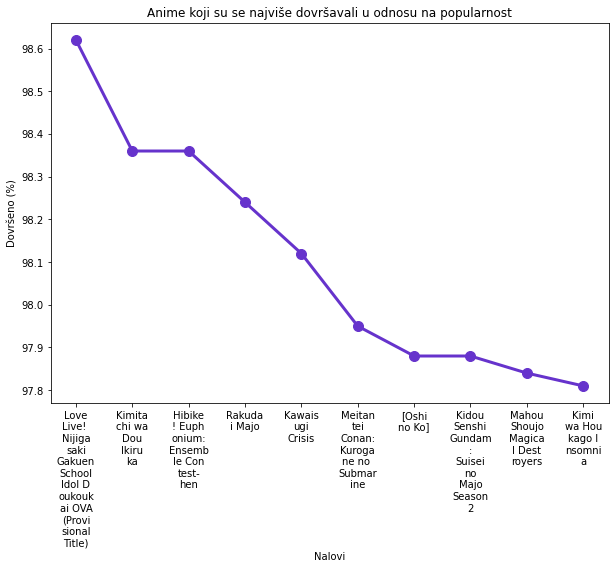

In [ ]:
compl_anime['Title']= ['\n'.join(wrap(x, 6)) for x in  compl_anime['Title']]
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(compl_anime['Title'], compl_anime['Percentage'], color=colors[14], linewidth=3.0, marker='.', markersize=20)
ax.set_title("The most completed anime in relation to popularity")
ax.set_xlabel('Label')
ax.set_ylabel('Completed (%)');

### 7. What are the most common words in anime titles?

'Fate/stay nightErgo ProxyHanbun no Tsuki ga Noboru SoraAyakashi: Japanese Classic HorrorMajor S2Kashimashi: Girl Meets GirlAmaenaide yo!! Katsu!!MagikanoKage kara Mamoru!Futari wa Precure: Splash☆StarYomigaeru Sora: Rescue WingsLemon Angel ProjectTactical RoarNerima Daikon BrothersKagihime Monogatari: Eikyuu Alice RinbukyokuKinnikuman II Sei: Ultimate Muscle 2Papillon RoseGinyuu Mokushiroku Meine Liebe WiederYoukai Ningen Bem (2006)Rakugo Tennyo OyuiBakukyuu HIT! Crash B-DamanWan Wan Serepu Soreyuke! TetsunoshinPlay Ball 2ndRecBinchou-tanFunny PetsOcha-ken: Hotto MonogatariFurakappaMushishiShakugan no ShanaJigoku ShoujoBLOOD+Black CatTouhai Densetsu Akagi: Yami ni Maiorita TensaiKarinNoein: Mou Hitori no Kimi eMai-OtomecapetaSolty ReiIdaten JumpCanvas 2: Niji-iro no SketchAngel HeartSonic X Season 2Ginga Densetsu WeedRockman.EXE BEASTCLUSTER EDGEGaiking: Legend of Daiku-MaryuFighting Beauty WulongBouken Ou Beet ExcellionGunparade OrchestraD.I.C.E.Animal YokochouKotencotencoGiniro no K

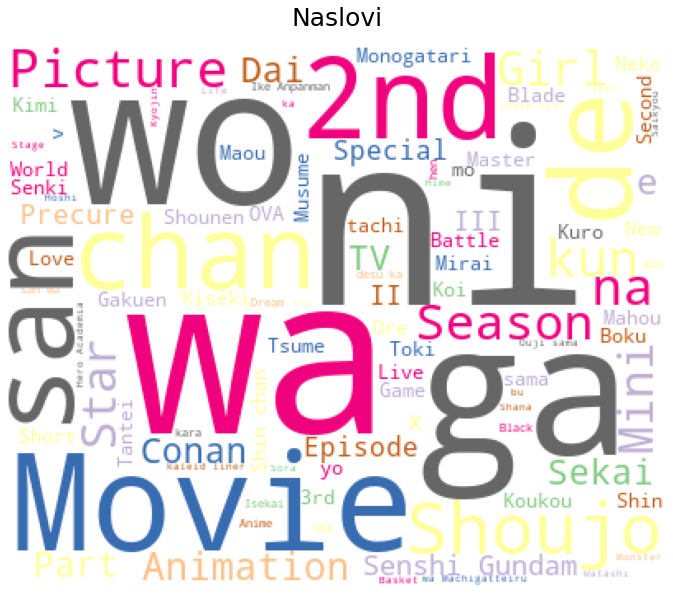

In [ ]:
from wordcloud import WordCloud

titles_text = ''.join([desc for desc in list(df.Title) if isinstance(desc, str)])
fig = plt.figure(figsize=(25, 10))

# counter = count_word_type(tagged_sentences, "NNP")
wc = WordCloud(width=400, height=330, max_words=100, colormap="Accent", background_color="white").generate(titles_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Titles", fontsize=25, pad=20);
titles_text

# 5. Statistics

In [ ]:
df.describe()

Year     Episodes  EpisodeDuration     Popularity    MeanScore  \
count  6468.000000  6468.000000      5446.000000    6468.000000  6468.000000   
mean   2014.494743    12.453879        18.882065   21749.474026    63.225850   
std       4.928856    22.788842        13.105103   49690.762922    11.365362   
min    2006.000000     1.000000         1.000000      11.000000     5.000000   
25%    2010.000000     1.000000         7.000000    1006.000000    57.000000   
50%    2015.000000    12.000000        24.000000    4768.000000    64.000000   
75%    2019.000000    13.000000        24.000000   18812.250000    71.000000   
max    2023.000000   744.000000       161.000000  643352.000000    91.000000   

          Favorites      Completed       Planning       Current       Dropped  
count   6468.000000    6468.000000    6468.000000   6468.000000   6468.000000  
mean     624.386092   13824.422851    5465.132808   1273.131571    704.884199  
std     2330.229465   35495.903921   10472.068732   3764.665889   1818.124886  
min        1.000000       4.000000       1.000000      0.000000      0.000000  
25%       11.000000     573.000000     267.750000     34.000000     23.000000  
50%       64.000000    2735.000000    1322.500000    152.000000     84.000000  
75%      519.250000   10938.250000    5450.250000    889.250000    505.250000  
max    56743.000000  542393.000000  120178.000000  78325.000000  35131.000000

##                      


Example of manual entry of the above measurements:

```
#count
df['Episodes'].count()

#standard deviation
df['Episodes'].std()

#mean, min, max
df['Episodes'].mean()
df['Episodes'].min()
df['Episodes'].max()
df['Episodes'].agg(['min','mean','max'])

#quartiles
df['Episodes'].median()
df['Episodes'].quantile([0.25, 0.5, 0.75], interpolation='midpoint')
```



## 5.1. Measures of dispersion and distribution

In [ ]:
# variance
var_ep = df['Episodes'].var()
# standard deviation
dev_ep = df['Episodes'].std()
# interquartile range
iqr_ep = sp.stats.iqr(df['Episodes'])
# sample range
sr_ep = df['Episodes'].max()- df['Episodes'].min()
print(f'The variance of the column "Episodes" is {round(var_ep, 2)}, the standard deviation is: {round(dev_ep, 2)}, the sample range is {sr_ep}, and the interquartile range is {iqr_ep}.')

Varijanca stupca "Episodes" je 519.33, standardna devijacija je: 22.79, raspon uzorka je 743.0, a interkvartilni raspon 12.0.


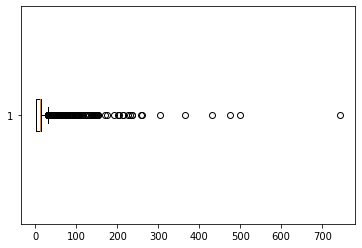

In [ ]:
plt.boxplot(df['Episodes'], vert=False);

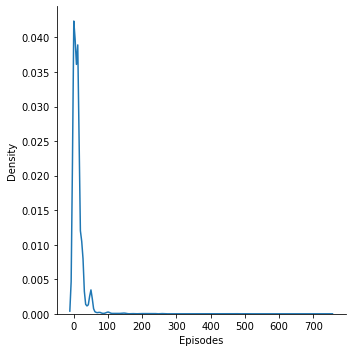

In [ ]:
sns.displot(df['Episodes'],kind="kde");

In [ ]:
var_epdur = df['EpisodeDuration'].var()
dev_epdur = df['EpisodeDuration'].std()
iqr_epdur = df['EpisodeDuration'].quantile(0.75, interpolation='midpoint')-df['EpisodeDuration'].quantile(0.25, interpolation='midpoint')
sr_epdur =  df['EpisodeDuration'].max()- df['EpisodeDuration'].min()
print(f'Varijanca stupca "EpisodeDuration" je {round(var_epdur, 2)}, standardna devijacija je: {round(dev_epdur, 2)}, raspon uzorka je {sr_epdur}, a interkvartilni raspon {iqr_epdur}.')

Varijanca stupca "EpisodeDuration" je 171.74, standardna devijacija je: 13.11, raspon uzorka je 160.0, a interkvartilni raspon 17.0.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


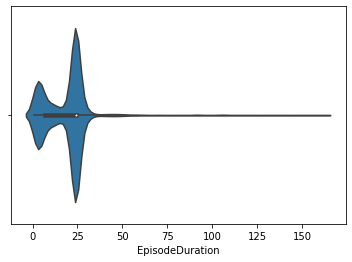

In [ ]:
sns.violinplot(df['EpisodeDuration']);

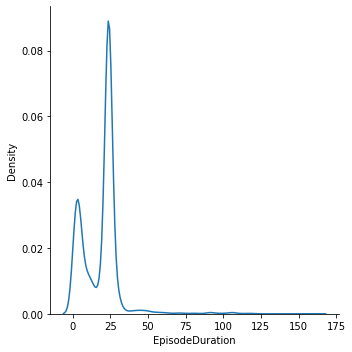

In [ ]:
sns.displot(df['EpisodeDuration'],kind="kde");

In [ ]:
var_pop = df['Popularity'].var()
dev_pop = df['Popularity'].std()
iqr_pop = sp.stats.iqr(df['Popularity'])
sr_pop =  df['Popularity'].max()- df['Popularity'].min()
print(f'The variance of the "Popularity" column is {round(var_pop, 2)}, the standard deviation is: {round(dev_pop, 2)}, the sample range is {sr_pop}, and the interquartile range is {iqr_pop}.')

Varijanca stupca "Popularity" je 2469171919.73, standardna devijacija je: 49690.76, raspon uzorka je 643341.0, a interkvartilni raspon 17806.25.


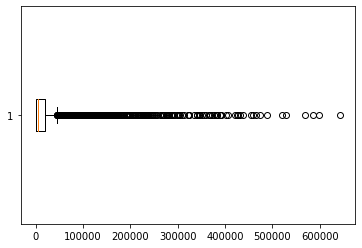

In [ ]:
plt.boxplot(df['Popularity'], vert=False);

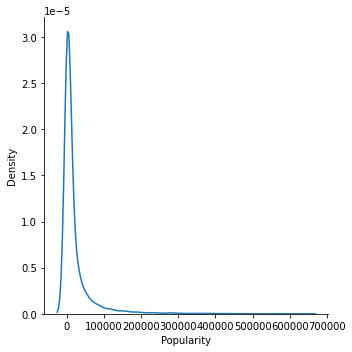

In [ ]:
sns.displot(df['Popularity'],kind="kde");

In [ ]:
var_ms = df['MeanScore'].var()
dev_ms = df['MeanScore'].std()
iqr_ms = sp.stats.iqr(df['MeanScore'])
sr_ms =  df['MeanScore'].max()- df['MeanScore'].min()
print(f'The variance of the "MeanScore" column is {round(var_ms, 2)}, the standard deviation is: {round(dev_ms, 2)}, the sample range is {sr_ms}, and the interquartile range is {iqr_ms}.')

Varijanca stupca "MeanScore" je 129.17, standardna devijacija je: 11.37, raspon uzorka je 86.0, a interkvartilni raspon 14.0.


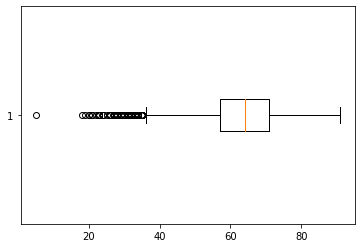

In [ ]:
plt.boxplot(df['MeanScore'], vert=False);

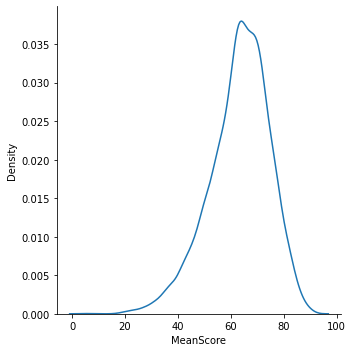

In [ ]:
sns.displot(df['MeanScore'],kind="kde");

In [ ]:
var_fav=df['Favorites'].var()
dev_fav=df['Favorites'].std()
iqr_fav = sp.stats.iqr(df['Favorites'])
sr_fav =  df['Favorites'].max()- df['Favorites'].min()
print(f'The variance of the "Favorites" column is {round(var_fav, 2)}, the standard deviation is: {round(dev_fav, 2)}, the sample range is {sr_fav}, and the interquartile range is {iqr_fav}.')

Varijanca stupca "Favorites" je 5429969.36, standardna devijacija je: 2330.23, raspon uzorka je 56742.0, a interkvartilni raspon 508.25.


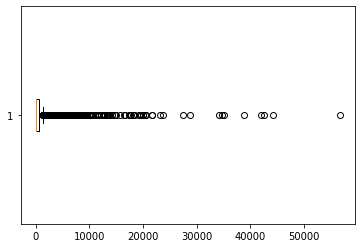

In [ ]:
plt.boxplot(df['Favorites'], vert=False);

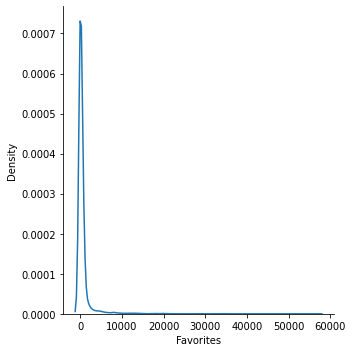

In [ ]:
sns.displot(df['Favorites'],kind="kde");

In [ ]:
var_complt = df['Completed'].var()
dev_complt = df['Completed'].std()
iqr_complt = sp.stats.iqr(df['Completed'])
sr_complt =  df['Completed'].max()- df['Completed'].min()
print(f'The variance of the "Completed" column is {round(var_complt, 2)}, the standard deviation is: {round(dev_complt, 2)}, the sample range is {sr_complt}, and the interquartile range is {iqr_complt}.')

Varijanca stupca "Completed" je 1259959195.17, standardna devijacija je: 35495.9, raspon uzorka je 542389.0, a interkvartilni raspon 10365.25.


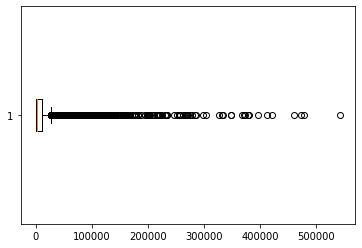

In [ ]:
plt.boxplot(df['Completed'], vert=False);

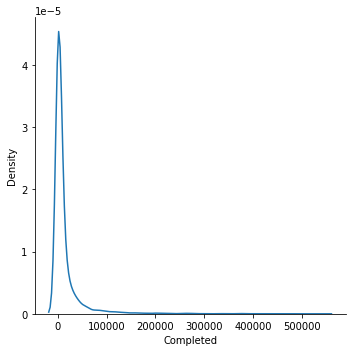

In [ ]:
sns.displot(df['Completed'],kind="kde");

In [ ]:
var_pln=df['Planning'].var()
dev_pln=df['Planning'].std()
iqr_pln = sp.stats.iqr(df['Planning'])
sr_pln =  df['Planning'].max()- df['Planning'].min()
print(f'The variance of the "Planning" column is {round(var_pln, 2)}, the standard deviation is: {round(dev_pln, 2)}, the sample range is {sr_pln}, and the interquartile range is {iqr_pln}.')

Varijanca stupca "Planning" je 109664223.52, standardna devijacija je: 10472.07, raspon uzorka je 120177.0, a interkvartilni raspon 5182.5.


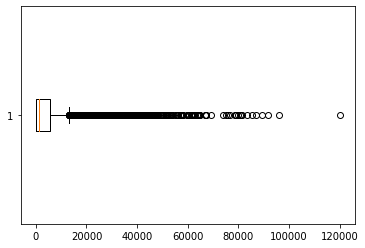

In [ ]:
plt.boxplot(df['Planning'], vert=False);

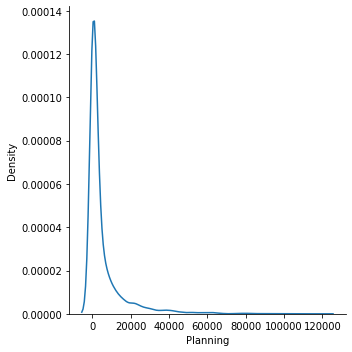

In [ ]:
sns.displot(df['Planning'],kind="kde");

In [ ]:
var_crnt=df['Current'].var()
dev_crnt=df['Current'].std()
iqr_crnt = sp.stats.iqr(df['Current'])
sr_crnt =  df['Current'].max()- df['Current'].min()
print(f'The variance of the "Current" column is {round(var_crnt, 2)}, the standard deviation is: {round(dev_crnt, 2)}, the sample range is {sr_crnt}, and the interquartile range is {iqr_crnt}.')

Varijanca stupca "Current" je 14172709.26, standardna devijacija je: 3764.67, raspon uzorka je 78325.0, a interkvartilni raspon 855.25.


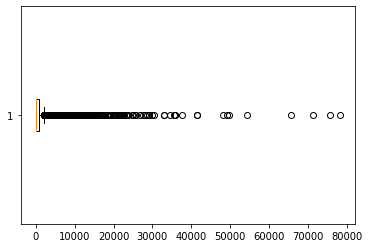

In [ ]:
plt.boxplot(df['Current'], vert=False);

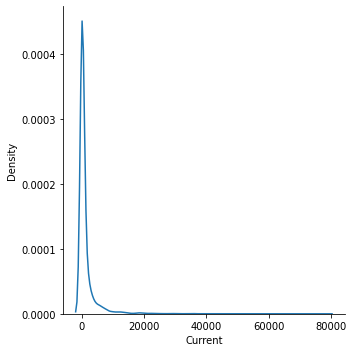

In [ ]:
sns.displot(df['Current'],kind="kde");

In [ ]:
var_drop=df['Dropped'].var()
dev_drop=df['Dropped'].std()
iqr_drop = sp.stats.iqr(df['Dropped'])
sr_drop =  df['Dropped'].max()- df['Dropped'].min()
print(f'The variance of the "Dropped" column is {round(var_drop, 2)}, the standard deviation is: {round(dev_drop, 2)}, the sample range is {sr_drop}, and the interquartile range is {iqr_drop}.')

Varijanca stupca "Dropped" je 3305578.1, standardna devijacija je: 1818.12, raspon uzorka je 35131.0, a interkvartilni raspon 482.25.


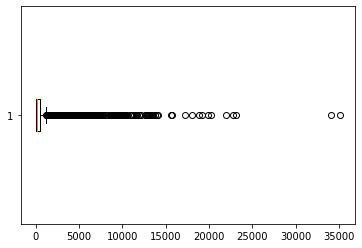

In [ ]:
plt.boxplot(df['Dropped'], vert=False);

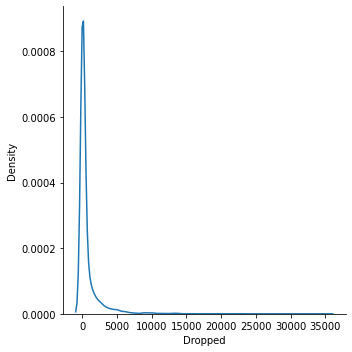

In [ ]:
sns.displot(df['Dropped'],kind="kde");

From the above graphical representations (box plot and density plot) and measures of dispersion, we can see that the data are generally not highly scattered, but outliers are consistent. Distributions are mostly positively skewed except for the "MeanScore" column, which is negatively skewed. Unimodality predominates in the sample, but there are consistent bimodal or multimodal distributions (more than one mode), which are most noticeable in the "EpisodeDuration" column.

## 5.2. Relationships among variables

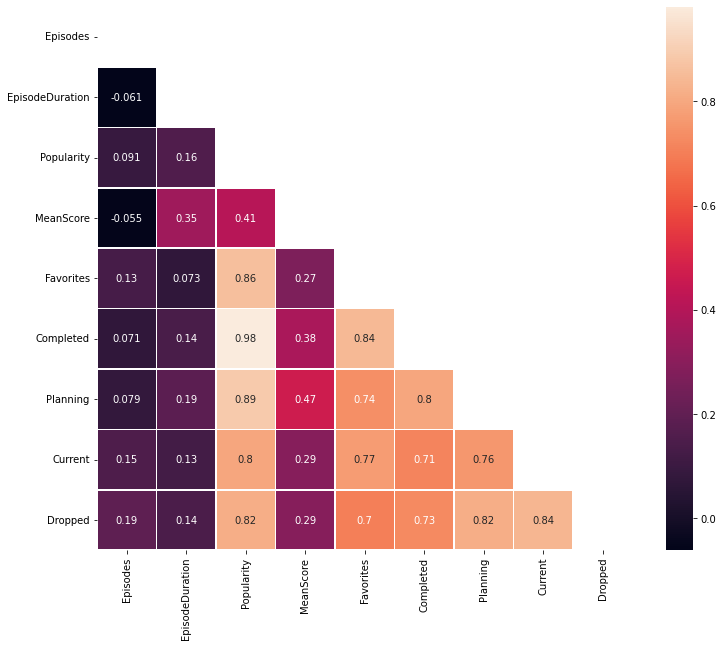

In [ ]:
# correlations between variables
#df.corr()
corr = df.drop('Year', axis=1).corr()
matrix = np.triu(corr)
fig=plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, linewidths=.5, cbar=True, mask = matrix);

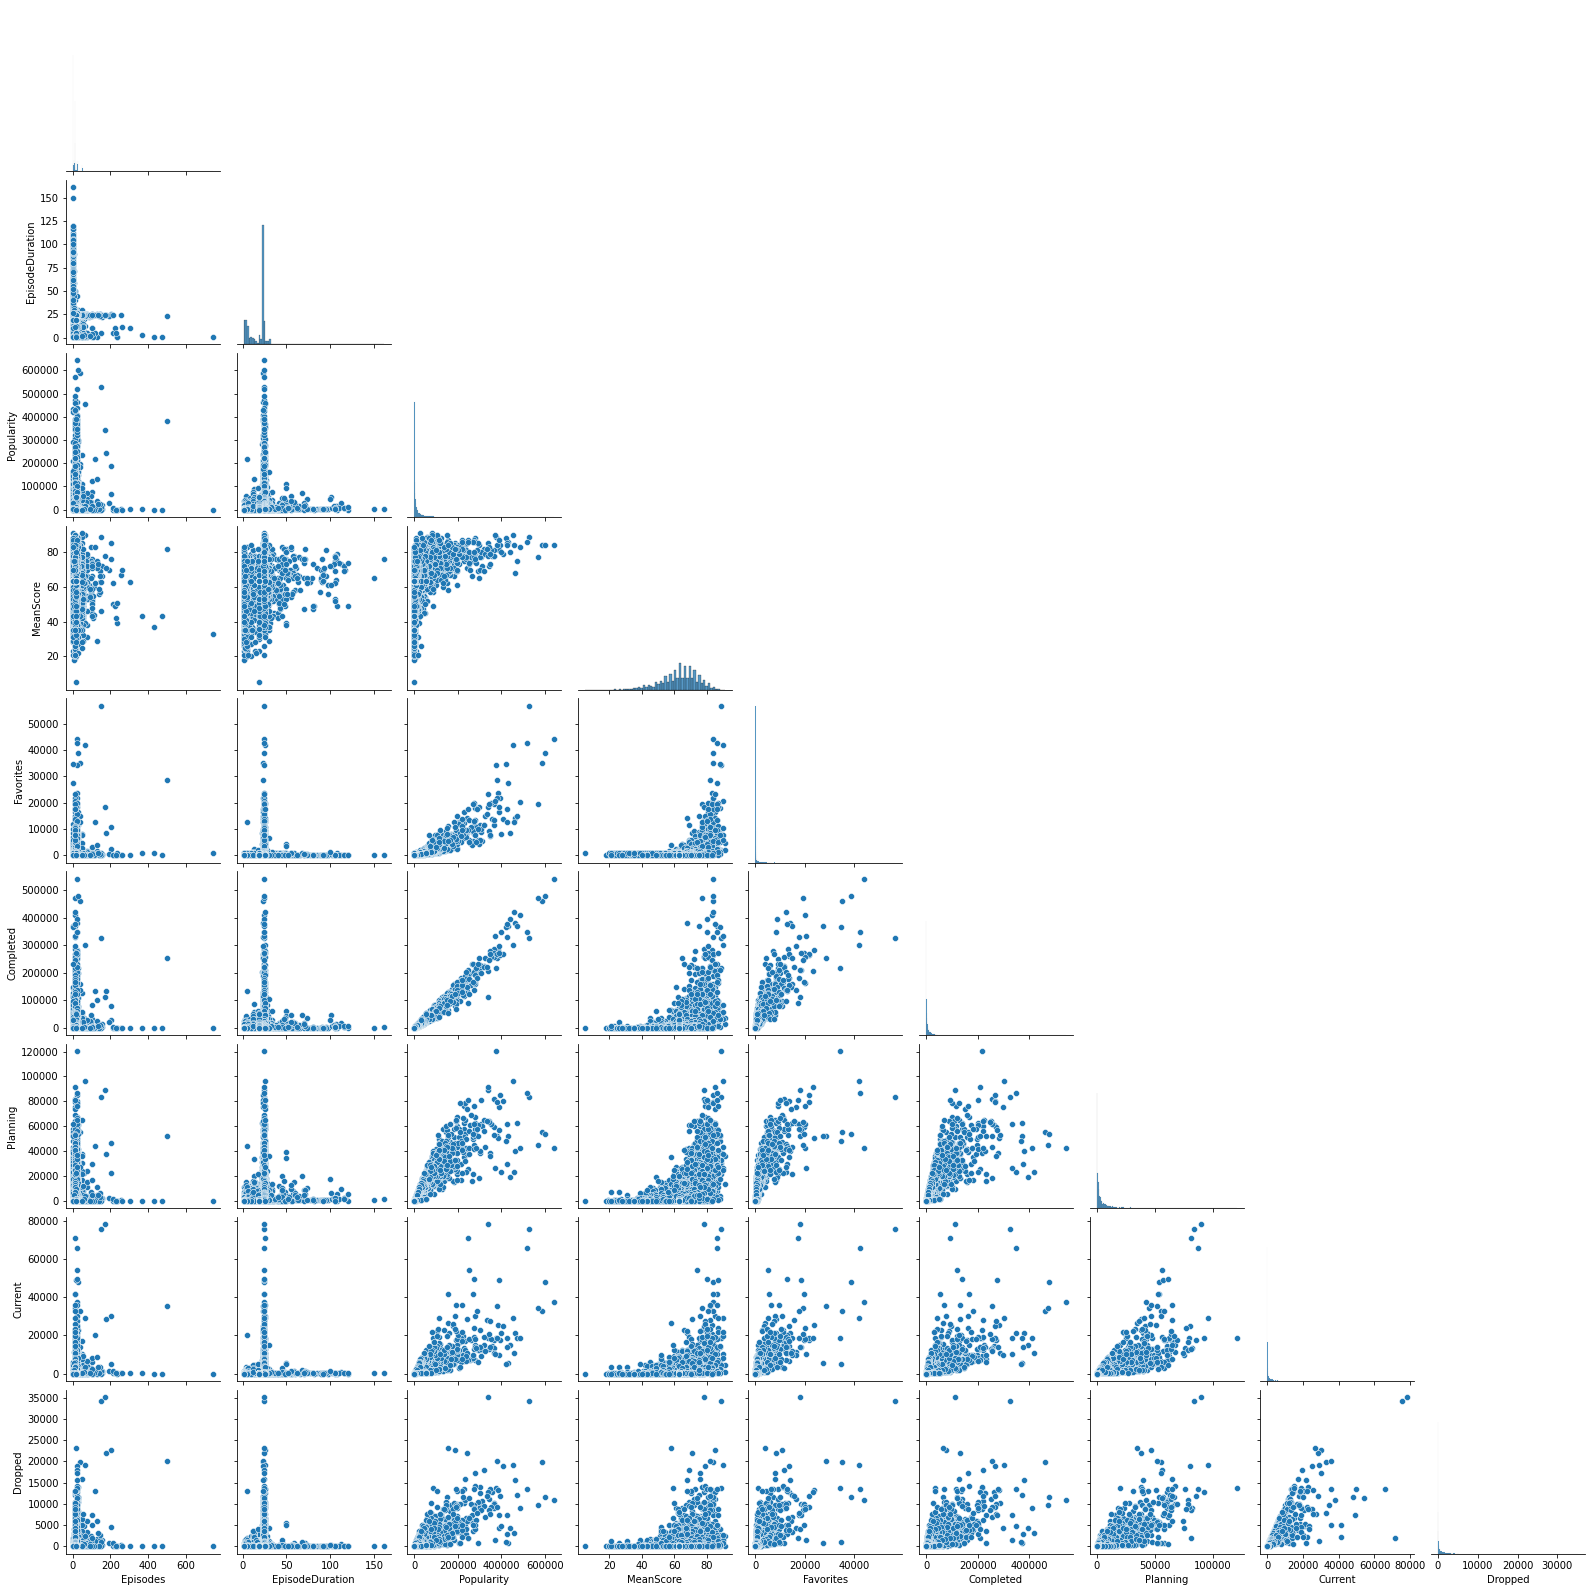

In [ ]:
sns.pairplot(df.drop('Year', axis=1), corner=True);

In the above **heatmap**, we observe that the number of episodes is weakly correlated with all other columns (linear independence), as well as the duration of the episode and the mean score. The "Popularity" column is correlated with the "Favorites," "Completed," "Planning," "Current," and "Dropped" columns. It is expected that this number will be correlated with the latter four columns because it is essentially their sum, and all columns correlated with the "Popularity" column will be correlated with the "Completed," "Planning," "Current," and "Dropped" columns. Regarding the correlation between the "Popularity" and "Favorites" columns, it is expected that if an anime has a large number of views, more people will mark it as a favorite.

From the **pairplot**, we can draw similar conclusions, only we can see how these relationships between variables look.

## 5.3. Statistic questions

### 5.3.1. Can we say that at least 50 percent of Anime has an episode duration longer than the average?

In [ ]:
# ep_dur_count = df.groupby(pd.cut(df.EpisodeDuration, np.arange(df['EpisodeDuration'].min(), df['EpisodeDuration'].max(), 5))).count()
# ep_dur_perc= ep_dur_count.assign(postotak = lambda x: round((x.EpisodeDuration / (ep_dur_count['EpisodeDuration'].sum()))*100))
# ep_dur_perc[['EpisodeDuration', 'postotak']]
##ili
ep_dur_ = df['EpisodeDuration'].apply(
    pd.Series.value_counts,
    bins=np.arange(df['EpisodeDuration'].min(), df['EpisodeDuration'].max(), 20)
).sum().reset_index()
ep_dur_.rename(columns={'index':'Span', 0: 'Count'}, inplace=True)
ep_dur_

Span   Count
0   (0.999, 21.0]  2115.0
1    (21.0, 41.0]  3186.0
2    (41.0, 61.0]    81.0
3    (61.0, 81.0]    20.0
4   (81.0, 101.0]    21.0
5  (101.0, 121.0]    21.0
6  (121.0, 141.0]     0.0

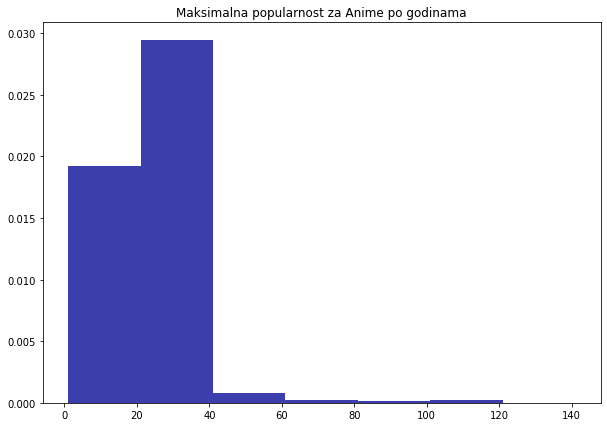

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['EpisodeDuration'], bins=np.arange(df['EpisodeDuration'].min(), df['EpisodeDuration'].max(), 20), density=True, color=colors[5])
ax.set_title('Maximum popularity for Anime by year')
plt.show();

In [ ]:
ep_dur_['Percentage']=ep_dur_['Count'].apply(lambda x: (x/ep_dur_['Count'].sum())*100)
ep_dur_

Span   Count  Percentage
0   (0.999, 21.0]  2115.0   38.850110
1    (21.0, 41.0]  3186.0   58.523145
2    (41.0, 61.0]    81.0    1.487877
3    (61.0, 81.0]    20.0    0.367377
4   (81.0, 101.0]    21.0    0.385746
5  (101.0, 121.0]    21.0    0.385746
6  (121.0, 141.0]     0.0    0.000000

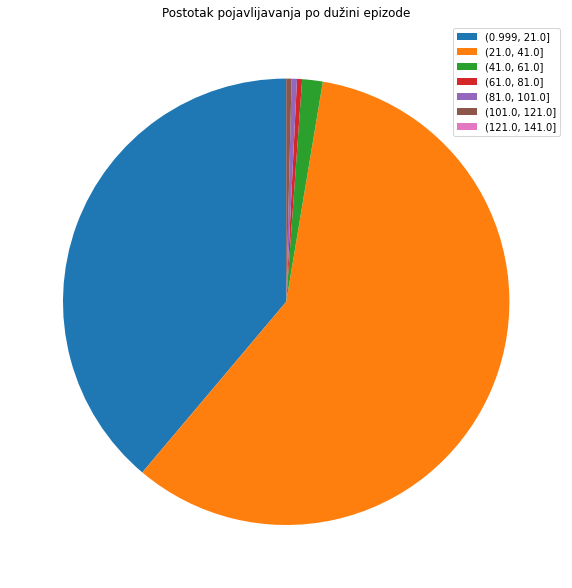

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
ax.pie(ep_dur_.Count, startangle=90)
ax.legend(ep_dur_.Span.apply(str))
ax.set_title('Percentage of occurrences per episode length')
plt.show();

In [ ]:
ep_dur_m = df['EpisodeDuration'].median() #median
ep_dur_greater_m = df[df['EpisodeDuration'] > ep_dur_m].count()['EpisodeDuration'] #number of greater
ep_dur_all = df['EpisodeDuration'].count() #counting older ones
perc_ep_dur = (ep_dur_greater_m/ep_dur_all)*100 #percentage of greater
perc_greater = perc_ep_dur > 50 #percentage greater than 50?
perc_greater, perc_ep_dur

(False, 16.121924348145427)

In [ ]:
ep_dur_less_m = df[df['EpisodeDuration'] < ep_dur_m].count()['EpisodeDuration']
perc_ep_dur = (ep_dur_less_m/ep_dur_all)*100
perc_less = perc_ep_dur > 50
perc_less, perc_ep_dur

(False, 49.651120088138086)

In [ ]:
ep_dur_eq_m = df[df['EpisodeDuration'] == ep_dur_m].count()['EpisodeDuration']
perc_ep_dur = (ep_dur_eq_m/ep_dur_all)*100
perc_eq = perc_ep_dur > 50
perc_eq, perc_ep_dur

(False, 34.22695556371649)

We can't say that at least 50 percent of Anime have an episode duration longer than average.

### 5.3.2. Which Anime genre has the highest dropout rate?

In [ ]:
genre_dropped = (df2.groupby('Genre').Dropped.sum()/(df2.groupby('Genre').Dropped.sum()+df2.groupby('Genre').Completed.sum())*100).round(2).sort_values(ascending=False).reset_index()
genre_dropped = genre_dropped.rename(columns={0:'Percetnage'})
genre_dropped

Genre  Percetnage
0    Mahou Shoujo        6.46
1           Music        5.70
2          Sci-Fi        5.61
3           Mecha        5.54
4   Slice of Life        5.44
5       Adventure        5.29
6         Fantasy        5.27
7          Comedy        5.25
8          Action        5.11
9    Supernatural        4.98
10         Horror        4.97
11  Psychological        4.91
12        Romance        4.91
13         Sports        4.88
14          Ecchi        4.84
15       Thriller        4.83
16          Drama        4.76
17        Mystery        4.67

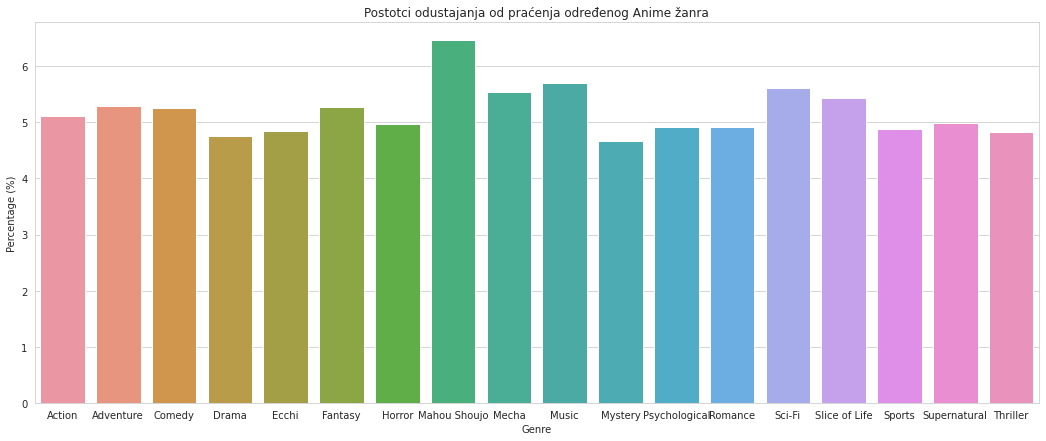

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x='Genre',y='Percetnage', data=genre_dropped)
ax.set_title('Percentages of unfollowing a certain Anime genre')
ax.set_ylabel('Percentage (%)');

### 5.3.3. What is the percentage of TV and TV Short Anime that have less than 8 episodes? What is the percentage of TV Short Anime that have more than 30 episodes?


In [ ]:
tvs = df[df['Format'].isin(['TV', 'TV Short'])][['Episodes']]
tvs_count=((tvs[tvs['Episodes'] < 8].count())/tvs.count())*100
print(f'The percentage of TV and TV Short Anime that have less than 8 episodes is {round(tvs_count.Episodes,2)}%.')

Postotak TV i TV Short Anime koji imaju manje od 8 epizoda je 2.17%.


In [ ]:
tvs = df[df['Format'] == 'TV Short'][['Episodes']]
tvs_count=((tvs[tvs['Episodes'] > 30].count())/tvs.count())*100
print(f'The percentage of TV Short Anime that have more than 30 episodes is {round(tvs_count.Episodes,2)}%.')

Postotak TV Short Anime koji imaju više od 30 epizoda je 16.48%.


### 5.3.4. What is the percentage of popularity of which source? What is the variance, standard deviation, etc.?

In [ ]:
pop_source = df.groupby('Source').Popularity.sum()
pop_source = (pop_source/df.Popularity.sum()*100).round(4).sort_values(ascending=False)
pop_source = pop_source.reset_index()
pop_source

Source  Popularity
0                Manga     52.2831
1          Light Novel     22.3620
2             Original     14.9606
3         Visual Novel      3.1230
4           Video Game      2.7571
5                Novel      2.0444
6                Other      0.7049
7   Multimedia Project      0.6971
8            Web Novel      0.1484
9            Doujinshi      0.1358
10                Game      0.1225
11               Comic      0.1009
12         Live Action      0.0298
13        Picture Book      0.0231
14               Anime      0.0088

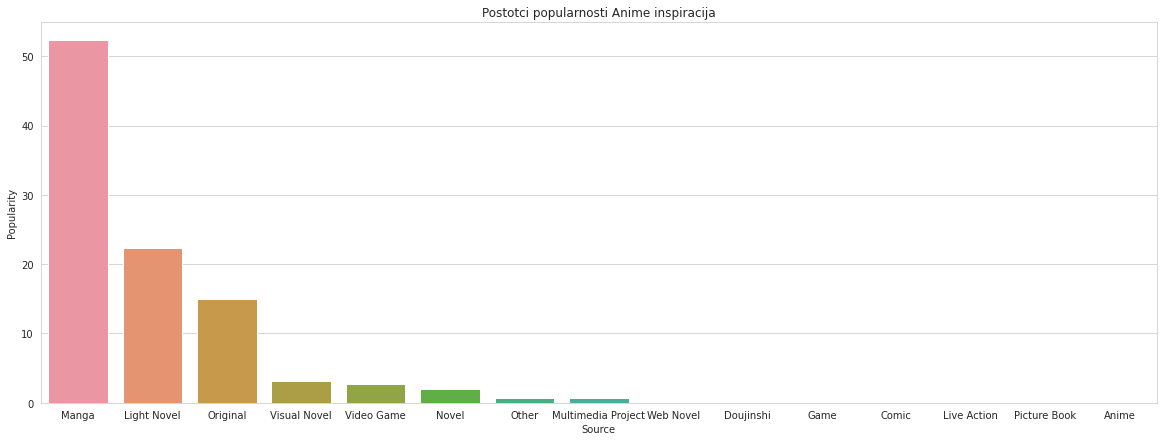

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title('Postotci popularnosti Anime inspiracija')
sns.barplot(data=pop_source, x=pop_source.Source, y=pop_source.Popularity,  order=pop_source.sort_values('Popularity', ascending=False).Source);

In [ ]:
ql = lambda x: x.quantile(0.25)
qu = lambda x: x.quantile(0.75)
agg_func={
    'Popularity': ['count','sum', 'min', 'max', 'median', 'std', 'var', ql, qu]
    }
df.groupby('Source').agg(agg_func).rename(columns={'<lambda_0>':'QL', '<lambda_1>':'QU'	})

Popularity                                          \
                        count         sum     min       max    median   
Source                                                                  
Anime                       9     12440.0    26.0    4580.0    1158.0   
Comic                      13    141971.0   735.0   43791.0    6012.0   
Doujinshi                  11    190999.0  2877.0   52070.0   13030.0   
Game                       17    172294.0   142.0  116755.0    2051.0   
Light Novel               668  31457922.0    52.0  465100.0   26194.0   
Live Action                 5     41876.0  1224.0   21910.0    4500.0   
Manga                    2302  73549556.0    11.0  643352.0    9391.0   
Multimedia Project         81    980635.0    50.0  104017.0    3740.0   
Novel                     146   2875903.0    14.0  123117.0    7897.5   
Original                 1657  21045870.0    11.0  431296.0    2184.0   
Other                     305    991588.0    35.0   47091.0     786.0   
Picture Book               31     32527.0    23.0   17526.0     170.0   
Video Game                488   3878535.0    28.0  161214.0    3570.5   
Visual Novel              221   4393348.0   323.0  377532.0    6643.0   
Web Novel                   2    208743.0   398.0  208345.0  104371.5   

                                                                      
                              std           var        QL         QU  
Source                                                                
Anime                 1392.890141  1.940143e+06    365.00    1440.00  
Comic                11749.628220  1.380538e+08   3836.00   13703.00  
Doujinshi            14751.664444  2.176116e+08   6681.00   24250.00  
Game                 27802.051025  7.729540e+08   1467.00    3959.00  
Light Novel          61808.371419  3.820275e+09   7076.50   60317.00  
Live Action           8390.729927  7.040435e+07   3305.00   10937.00  
Manga                65205.258362  4.251726e+09   2719.75   29711.00  
Multimedia Project   19020.586178  3.617827e+08   1567.00   12329.00  
Novel                26775.460287  7.169253e+08   1924.00   27498.00  
Original             32660.971914  1.066739e+09    551.00    9477.00  
Other                 6980.501473  4.872740e+07    195.00    2972.00  
Picture Book          3175.791827  1.008565e+07     96.00     411.50  
Video Game           14084.250377  1.983661e+08   1204.75    9151.25  
Visual Novel         38515.330210  1.483431e+09   2652.00   22375.00  
Web Novel           147040.733827  2.162098e+10  52384.75  156358.25

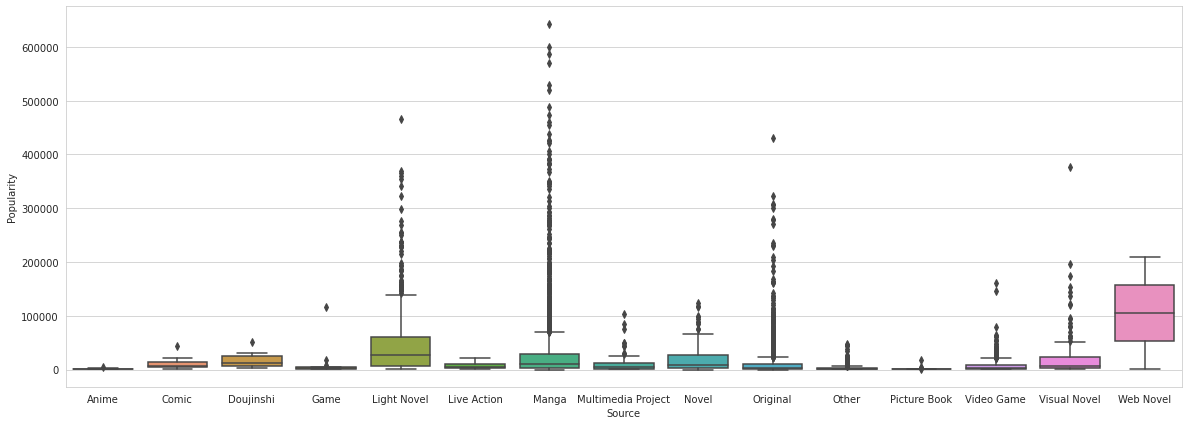

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x='Source',y='Popularity', data=df)

### 5.3.5. What is the percentage of Anime whose episode length is outside and inside the interquartile range?

In [ ]:
qu_epdur = df['EpisodeDuration'].quantile(0.75)
ql_epdur = df['EpisodeDuration'].quantile(0.25)
out_iqr = df[(df['EpisodeDuration'] > qu_epdur) | (df['EpisodeDuration'] < ql_epdur)]['EpisodeDuration'].count()
in_iqr = df[(df['EpisodeDuration'] <= qu_epdur) & (df['EpisodeDuration'] >= ql_epdur)]['EpisodeDuration'].count()
in_iqr_bor_u = df[(df['EpisodeDuration'] == qu_epdur)]['EpisodeDuration'].count()
in_iqr_bor_l = df[(df['EpisodeDuration'] == ql_epdur)]['EpisodeDuration'].count()
all_epdur = df['EpisodeDuration'].count()
perc_out = (out_iqr/all_epdur)*100
perc_bor_u = (in_iqr_bor_u/all_epdur)*100
perc_bor_l =(in_iqr_bor_l/all_epdur)*100
perc_bor =perc_bor_u+perc_bor_l
perc_in = (in_iqr/all_epdur)*100
print(f'The percentage of anime that is within the interquartile range is: {round(perc_in, 2)}% \n'+
      f'of which there are exactly {round(perc_bor_u, 2)}% on the upper border, and {round(perc_bor_l, 2)}% on the lower border, a total of {round(perc_bor, 2)}%.')
print(f'The percentage of those outside the interquartile range is {round(perc_out, 2)}%')

Postotak anime koji se nalazi unutar interkvartilnog raspona je: 59.49% 
od čega ih je točno na gornjoj granici 34.23%, a na donjoj 0.9%, ukupno 35.13%.
Postotak onih koji se nalaze izvan interkvartilnog raspona je 40.51%


# 6. Linear Regression

In [ ]:
# data preparation
## our popularity is equal to the sum of completed, dropped, planning and current
## we will throw out the data in the training set for which the "Favorites" field is empty
## we will remove the favorite tags from the prediction data (for now, these numbers are very small)
train_data=df[df['Year']<2023][['Dropped', 'Completed', 'Planning', 'Current', 'Favorites']]
test_data=df[df['Year']>=2023][['Title','Dropped', 'Completed', 'Planning', 'Current']]
train_data.dropna(subset=['Favorites'], inplace=True)
train_data.head()

Dropped  Completed  Planning  Current  Favorites
0   4340.0    81831.0   28558.0   4423.0     1457.0
1   4506.0    50251.0   31419.0   4708.0     2736.0
2    271.0     7309.0    5768.0    309.0       80.0
3    297.0     6228.0    4138.0    371.0       58.0
4    122.0     7898.0    1657.0    234.0      152.0

In [ ]:
# data shape for training and prediction
 train_data.shape, test_data.shape

((6322, 5), (146, 5))

In [ ]:
# split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data[['Dropped', 'Completed', 'Planning', 'Current']], train_data['Favorites'],  test_size=0.2, random_state=42)

In [ ]:
# scaling with StandardScaler because the data has large values
## z = (x - u) / s -> u - arithmetic mean, s - standard derivative
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
***Linear Regression***
---
It's simply an attempt to fit a straight line to a set of paired observations: $(x_1, y_1), (x_2, y_2), ... , (x_n, y_n)$. The mathematical expression for this "straight line" is $y = a_0 + a_1x + e$, where $a_0$ and $a_1$ are coefficients representing the intercept and slope, and $e$ is the error or residual between the model and the observation. The error or residual is the deviation between the true value $y$ and the approximate value $a_0 + a_1x$ predicted by the linear equation.

**Coef** - Estimated coefficients for the linear regression problem.

**Intercept** - The intercept term in the linear model.

**Score** - Returns the coefficient of determination of the prediction.

In [ ]:
# model
from sklearn import linear_model

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

print("Coef:", est.coef_, "\nIntercept:", est.intercept_)
print("Score:", est.score(X_train, y_train))

Coef: [-163.00456651 1545.67022835 -192.11192887 1051.78603698] 
Intercept: 629.5525512670885
Score: 0.7957055643302142


**R2 score** is a crucial metric used to assess the performance of regression-based machine learning models. It's also known as the coefficient of determination. It measures the proportion of variance in the dependent variable that is predictable from the independent variable ((total variance explained by the model) / total variance). The value can range from [0, 1] (or from 0% to 100%), and the closer the R2 score is to 1 (100%), the better the model, meaning the variables have a stronger correlation.

**Mean Squared Error (MSE)** is the average of the squared errors. A higher number indicates a greater error. In this case, error refers to the difference between observed values y1, y2, y3, ... and predicted values pred(y1), pred(y2), pred(y3), ... Each difference is squared ((pred(yn) - yn) ) ** 2) so that negative and positive values do not cancel each other out.

**RMSE** is the square root of MSE. RMSE is more intuitive to us as it is on the scale of the original data.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
pred_y = est.predict(X_test)
print('R2 = ', r2_score(y_test, pred_y), 'MSE =', mean_squared_error(y_test, pred_y) ,' RMSE = ', sqrt(mean_squared_error(y_test, pred_y)))

R2 =  0.6527339318387129 MSE = 1854252.5526836577  RMSE =  1361.7094229987754


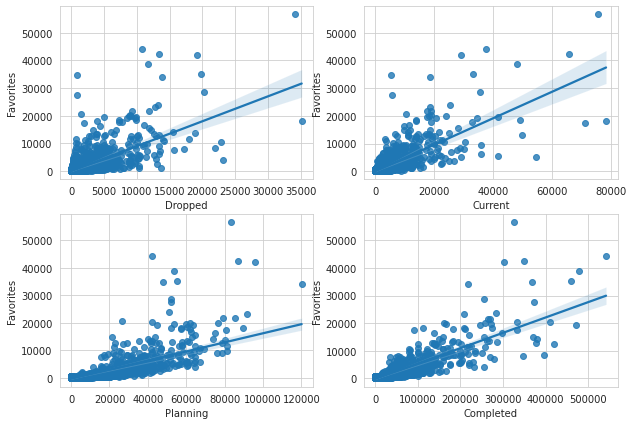

In [ ]:
# scatter diagram for individual variables
fig, axes = plt.subplots(2,2, figsize=(10,7))
sns.regplot(x='Dropped', y='Favorites', data=train_data, ax = axes[0][0]);
sns.regplot(x='Current', y='Favorites', data=train_data, ax = axes[0][1]);
sns.regplot(x='Planning', y='Favorites', data=train_data, ax = axes[1][0]);
sns.regplot(x='Completed', y='Favorites', data=train_data, ax = axes[1][1]);

**Statsmodels** is a Python module that provides classes and functions for estimating various statistical models, as well as for conducting statistical tests and exploring statistical data.

In [ ]:
import statsmodels.api as sm
x = X_train
y = y_train
x = sm.add_constant(x)

lm = sm.OLS(y, x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Favorites   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4919.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -42448.
No. Observations:                5057   AIC:                         8.491e+04
Df Residuals:                    5052   BIC:                         8.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        629.5526     15.049     41.834      0.0

In [ ]:
test_data.head()

Title  Dropped  Completed  \
6322                              VINLAND SAGA SEASON 2    362.0    48763.0   
6323  Maou Gakuin no Futekigousha: Shijou Saikyou no...    305.0    31492.0   
6324                  Tokyo Revengers: Seiya Kessen-hen    390.0    27071.0   
6325                              NieR:Automata Ver1.1a    241.0    24194.0   
6326                Ijiranaide, Nagatoro-san 2nd Attack    276.0    22808.0   

      Planning  Current  
6322   26982.0    429.0  
6323   21632.0    656.0  
6324   21690.0    577.0  
6325   22209.0    580.0  
6326   16294.0    365.0

In [ ]:
# prediction
def predict_favorites(title):
  data = test_data[test_data['Title'] == title][['Dropped', 'Completed', 'Planning', 'Current']].reset_index().drop(['index'], axis=1)
  data = scaler.transform(data)
  return est.predict(data)[0]

In [ ]:
print(predict_favorites('VINLAND SAGA SEASON 2'))

1602.7250928097528


#7. Exploring Anime Franchises Using the Toolz Library and Streaming Function

##7.1. Streaming function with yield

Yield - relinquishes control (yields) to the function, allowing it to process only a portion of the data, then waits for further data processing steps until all subsequent steps process the current part of the data.

In [ ]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import memory_profiler as mem_profile
import time

In [ ]:
def title_filter_Dropped(name):
  x=df[df['Title'].str.contains(name)] # save data that contains a specific name
  dropped=0
  y=x['Dropped'] # save the Dropped columns to a variable
  for elem in y:
    dropped+=elem
    return dropped # returning an individual element

In [ ]:
def title_filter_Completed(name):
  x=df[df['Title'].str.contains(name)] # save data that contains a specific name
  Completed=0
  y=x['Completed'] # save the Dropped columns to a variable
  for elem in y:
    Completed+=elem
    return Completed # returning an individual element

In [ ]:
def title_filter_Planning(name):
  x=df[df['Title'].str.contains(name)] # save data that contains a specific name
  Planning=0
  y=x['Planning'] # save the Dropped columns to a variable
  for elem in y:
    Planning+=elem
    return Planning # returning an individual element

In [ ]:
def title_filter_Dropped_stream(name):
  x=df[df['Title'].str.contains(name)] # save data that contains a specific name

  y=x['Dropped'] # save the Dropped columns to a variable
  for elem in y:
    yield elem # returning an individual element

In [ ]:
def title_filter_Completed_stream(name):
  x=df[df['Title'].str.contains(name)] # save data that contains a specific name

  y=x['Completed'] # save the Complated columns to a variable
  for elem in y:
    yield elem # returning an individual element

In [ ]:
def title_filter_Planning_stream(name):
  x=df[df['Title'].str.contains(name)] # save data that contains a specific name

  y=x['Planning'] # save the Planning columns to a variable
  for elem in y:
    yield elem # returning an individual element

In [ ]:
print('before: {}'.format(mem_profile.memory_usage()[0]))
rez=title_filter_Dropped('ONE PIECE')
print('after: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('before: {}'.format(mem_profile.memory_usage()[0]))
rez1=title_filter_Dropped_stream('ONE PIECE')
print('after: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('before: {}'.format(mem_profile.memory_usage()[0]))
rez2=title_filter_Completed('ONE PIECE')
print('after: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('before: {}'.format(mem_profile.memory_usage()[0]))
rez3=title_filter_Completed_stream('ONE PIECE')
print('after: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('before: {}'.format(mem_profile.memory_usage()[0]))
rez4=title_filter_Planning('ONE PIECE')
print('after: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('before: {}'.format(mem_profile.memory_usage()[0]))
rez5=title_filter_Planning_stream('ONE PIECE')
print('after: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


##7.2. Toolz streaming library


The Toolz library is designed to leverage the benefits of Python iterators and easily manipulate data streams. It uses methods such as pipe, curry, sliding window, etc.

In [ ]:
import toolz as tz
tz.pipe('ONE PIECE',title_filter_Dropped_stream,np.sum) # arguments (data, our function, what we want with the returned data)

1782.0

In [ ]:
tz.pipe('ONE PIECE',title_filter_Completed_stream,np.sum)

269229.0

In [ ]:
tz.pipe('ONE PIECE',title_filter_Planning_stream,np.sum)

62634.0

# 8. Recommendation System

In [ ]:
from scipy.spatial.distance import cosine # cosine of the angle between two vectors

In [ ]:
df_4 = df.drop_duplicates(subset=['Link'], keep='first', ignore_index=True) # remove duplicates

In [ ]:
# checking if the genre is in the list of genres that has the anime we are interested in
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False

The cosine of the angle between two vectors can be obtained as follows:

<center>
$cos \rho = 1- \frac{x \cdot y}{||x|| \cdot ||y||}$

In [ ]:
%%time
def get_recommendation(name):
    anime_genre = df_4[df_4['Title']==name].Genre.values[0] #get the genres of anime we are interested in
    cols = df_4[df_4['Genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['Title'].tolist() # find all anime titles that have at least one of the genres
    animemat = df_4[df_4['Title'].isin(cols)].pivot_table(
        columns='Title',values=['Favorites', 'MeanScore', 'Completed', 'Planning', 'Dropped']) # pivot table of anime that have at least one same genre
    anime_pop = animemat[name] #get the row from the pivot table that interests us
    anime_table = animemat.apply(lambda x: (1 - cosine(
        [anime_pop['Favorites'], anime_pop['MeanScore'], anime_pop['Completed'], anime_pop['Planning'], anime_pop['Dropped']],
        [x['Favorites'], x['MeanScore'],x['Completed'], x['Planning'], x['Dropped'] ]))
    ) #we are looking for the cosines of the angle
    recc_table = pd.DataFrame(anime_table.sort_values(ascending=False)).reset_index() #sort the table by matching by the cosine of the angle
    recc_table.rename(columns={0 : 'Cosine'}, inplace=True) #rename the column
    recc_table = recc_table.head(10) #get top 10 matches
    recc_top = df_4[df_4['Title'].isin(recc_table['Title'])].reset_index() #get data from df about those top 10 matches
    recc_top = recc_top[['Title', 'Year', 'Episodes', 'EpisodeDuration', 'Studios', 'Source', 'Genre', 'MeanScore', 'Favorites', 'Popularity']]
    recc_top['Cosine']=recc_table['Cosine'] #add the cosine measure to the new table
    return recc_top

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 8.34 µs


In [ ]:
%%time
import math
def cosine_similarity(v1,v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x # square norm of vector x
        sumyy += y*y # square norm of vector y
        sumxy += x*y # scalar product of vectors x and y
    return 1 - (sumxy/math.sqrt(sumxx*sumyy)) # 1 - cosine (by formula)
def get_recommendation_by_hand(name):
    anime_genre = df_4[df_4['Title']==name].Genre.values[0] #get the genres of anime we are interested in
    cols = df_4[df_4['Genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['Title'].tolist() # find all anime titles that have at least one of the genres
    animemat = df_4[df_4['Title'].isin(cols)].pivot_table(
        columns='Title',values=['Favorites', 'MeanScore', 'Completed', 'Planning', 'Dropped']) # pivot table of anime that have at least one same genre
    anime_pop = animemat[name] #get the row from the pivot table that interests us
    anime_table = animemat.apply(lambda x: (1 - cosine_similarity(
        [anime_pop['Favorites'], anime_pop['MeanScore'], anime_pop['Completed'], anime_pop['Planning'], anime_pop['Dropped']],
        [x['Favorites'], x['MeanScore'],x['Completed'], x['Planning'], x['Dropped'] ]))
    ) #we are looking for the cosines of the angle
    recc_table = pd.DataFrame(anime_table.sort_values(ascending=False)).reset_index() #sort the table by matching by the cosine of the angle
    recc_table.rename(columns={0 : 'Cosine'}, inplace=True) #rename the column
    recc_table = recc_table.head(10) #get top 10 matches
    recc_top = df_4[df_4['Title'].isin(recc_table['Title'])].reset_index() #get data from df about those top 10 matches
    recc_top = recc_top[['Title', 'Year', 'Episodes', 'EpisodeDuration', 'Studios', 'Source', 'Genre', 'MeanScore', 'Favorites', 'Popularity']]
    recc_top['Cosine']=recc_table['Cosine'] #add the cosine measure to the new table
    return recc_top

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.6 µs


In [ ]:
%%time
get_recommendation('Ergo Proxy') # get recommendations for Anime

CPU times: user 274 ms, sys: 0 ns, total: 274 ms
Wall time: 278 ms


Title  Year  Episodes  \
0                                         Ergo Proxy  2006      23.0   
1                                      Casshern Sins  2008      24.0   
2                                         Durarara!!  2010      24.0   
3                                        PSYCHO-PASS  2012      22.0   
4                       Soredemo Sekai wa Utsukushii  2014      12.0   
5                      Yama no Susume: Second Season  2014      24.0   
6                    Kujira no Kora wa Sajou ni Utau  2017      12.0   
7                                      Munou na Nana  2020      13.0   
8      Tensei Shitara Slime Datta Ken: Tensura Nikki  2021      12.0   
9  Yuusha Party wo Tsuihou Sareta Beast Tamer, Sa...  2022      13.0   

   EpisodeDuration         Studios       Source  \
0             25.0        Manglobe     Original   
1             24.0        MADHOUSE        Other   
2             24.0    Brain's Base  Light Novel   
3             23.0  Production I.G     Original   
4             22.0  Studio Pierrot        Manga   
5             14.0           8-bit        Manga   
6             24.0      J.C. Staff        Manga   
7             24.0          Bridge        Manga   
8             24.0           8-bit        Manga   
9             24.0     EMT Squared  Light Novel   

                                               Genre  MeanScore  Favorites  \
0        [Adventure, Mystery, Psychological, Sci-Fi]       76.0     2736.0   
1  [Action, Adventure, Drama, Psychological, Sci-Fi]       73.0      673.0   
2                    [Action, Mystery, Supernatural]       79.0     5827.0   
3          [Action, Psychological, Sci-Fi, Thriller]       82.0     9153.0   
4                      [Adventure, Fantasy, Romance]       73.0      786.0   
5                 [Adventure, Comedy, Slice of Life]       75.0      185.0   
6  [Adventure, Drama, Fantasy, Mystery, Romance, ...       69.0      672.0   
7  [Drama, Horror, Psychological, Supernatural, T...       71.0     1401.0   
8        [Adventure, Comedy, Fantasy, Slice of Life]       74.0     1040.0   
9                               [Adventure, Fantasy]       69.0      949.0   

   Popularity    Cosine  
0     93739.0  1.000000  
1     27338.0  0.999878  
2    198621.0  0.999849  
3    234841.0  0.999747  
4     45446.0  0.999743  
5     10635.0  0.999726  
6     51169.0  0.999709  
7     73067.0  0.999682  
8     59360.0  0.999665  
9     27262.0  0.999619

In [ ]:
%%time
get_recommendation_by_hand('Ergo Proxy')

CPU times: user 173 ms, sys: 0 ns, total: 173 ms
Wall time: 176 ms


Title  Year  Episodes  \
0                                         Ergo Proxy  2006      23.0   
1                                      Casshern Sins  2008      24.0   
2                                         Durarara!!  2010      24.0   
3                                        PSYCHO-PASS  2012      22.0   
4                       Soredemo Sekai wa Utsukushii  2014      12.0   
5                      Yama no Susume: Second Season  2014      24.0   
6                    Kujira no Kora wa Sajou ni Utau  2017      12.0   
7                                      Munou na Nana  2020      13.0   
8      Tensei Shitara Slime Datta Ken: Tensura Nikki  2021      12.0   
9  Yuusha Party wo Tsuihou Sareta Beast Tamer, Sa...  2022      13.0   

   EpisodeDuration         Studios       Source  \
0             25.0        Manglobe     Original   
1             24.0        MADHOUSE        Other   
2             24.0    Brain's Base  Light Novel   
3             23.0  Production I.G     Original   
4             22.0  Studio Pierrot        Manga   
5             14.0           8-bit        Manga   
6             24.0      J.C. Staff        Manga   
7             24.0          Bridge        Manga   
8             24.0           8-bit        Manga   
9             24.0     EMT Squared  Light Novel   

                                               Genre  MeanScore  Favorites  \
0        [Adventure, Mystery, Psychological, Sci-Fi]       76.0     2736.0   
1  [Action, Adventure, Drama, Psychological, Sci-Fi]       73.0      673.0   
2                    [Action, Mystery, Supernatural]       79.0     5827.0   
3          [Action, Psychological, Sci-Fi, Thriller]       82.0     9153.0   
4                      [Adventure, Fantasy, Romance]       73.0      786.0   
5                 [Adventure, Comedy, Slice of Life]       75.0      185.0   
6  [Adventure, Drama, Fantasy, Mystery, Romance, ...       69.0      672.0   
7  [Drama, Horror, Psychological, Supernatural, T...       71.0     1401.0   
8        [Adventure, Comedy, Fantasy, Slice of Life]       74.0     1040.0   
9                               [Adventure, Fantasy]       69.0      949.0   

   Popularity    Cosine  
0     93739.0  1.000000  
1     27338.0  0.999878  
2    198621.0  0.999849  
3    234841.0  0.999747  
4     45446.0  0.999743  
5     10635.0  0.999726  
6     51169.0  0.999709  
7     73067.0  0.999682  
8     59360.0  0.999665  
9     27262.0  0.999619

# 9. Conclusion

<p align="justify">
Through data collection, processing, analysis, and predictions, we can draw numerous conclusions. As we assumed in the introduction, the entire process was quite interesting for analysis. If we were to undertake most of the project without the input libraries we used, the whole process would take much longer, and most tasks would be much more complicated (e.g., data collection from these websites would take forever or writing additional functions as in recommendation systems). Therefore, using the right tools in the right way can not only speed up the processing process but also simplify it significantly.
<p align="justify">
Although structured data is sometimes available on the internet for topics of interest, sometimes this data can be outdated (even in the short term), insufficient, or nonexistent for some analyses of interest. Independently, by collecting them, we can solve such problems, as in this project where the available data is somewhat outdated.
We loaded the data from two interconnected pages, and due to the large amount of data, it took a long time. After fetching, we started getting acquainted with and preparing the data for processing. The data had 19 columns and 7619 rows.
<p align="justify">
Properly understanding the data structure and preparing it for analysis can simplify not only working with the data but also make the data more manageable and remove the causes of potential errors in some calculations (e.g., NaN values or duplicates).
In preparation, we first removed the unnecessary "Unnamed" column and dropped unnecessary labels such as "%" in the MeanScore column, which was then converted to an integer. We transformed the episode duration into minutes, e.g., 1h 15min -> 75min. Because anime is produced in other countries in different languages, we simplified the Format column by removing country labels and merging them into one value. For example, TV and TV(Chinese) -> TV. Before processing, the data types were object and float64, and now we have changed Seasons, Format, Status, Source, and Studio to categorical variables. We checked for duplicates in the data through the Link column. Namely, we kept the data because an anime series can extend over multiple seasons and leave the same link. When checking for missing data, we removed all rows with 8 or more missing values, resulting in a difference of 126 in the number of rows. To reconstruct the missing data for the title, we used the title data from the Link column. Since some anime formats do not have episodes (e.g., movies), they also do not have values in the EpisodeDuration column. We filled in the Favorites and MeanScore values with the mean values of that column. We did the same for EpisodeDuration except when it's a movie format. After a new review of the data, the difference in NaN values is 452. The Genre column has fields with multiple values, so we made a copy of the table in which the genres are separated for easier use.
<p align="justify">
EDA and statistics allow us to get more familiar with the semantics of the data, to see how the data behaves, whether they depend on each other, etc. This step is important so that we can proceed with the data. For example, prediction based on data that is completely uncorrelated can lead us to a linear regression model that predicts nothing.
<p align="justify">
Through exploratory analysis, we noticed that there is an equal number of anime per season and per year. Likewise, we noticed that there is a significantly smaller number in the year 2023. The reason for this is that not all the data is available yet, and many data are actually announcements. We compared the popularity of anime by year with different popularity measures and got different graphs. Namely, by comparing names by favorites and popularity, we noticed that some names still appear. Furthermore, we explored the productivity and popularity of production companies and where their inspiration comes from. We concluded that the generally most active production company is J. C. Staff. It also resulted as the most active in 4 out of 17 previous years. Although it is the most active, the most popular anime was made by the production company A-1 Pictures, and the anime with the longest duration and number of episodes was made by the production company Tomason. Inspiration for all anime comes from various sources, with manga, light novels, or the anime being original being the most common. After exploring production companies, we wondered what the most common genre is and how it has changed over the years. While action takes the title of the most popular genre, comedy is actually the most common. Over the years, we can notice a decrease in the number, but we must take into account that one anime can be classified into multiple genres, i.e., it can be both comedy and action at the same time. Regarding the number of episodes and their duration, over the years, the number of episodes has started to increase while their duration has decreased. We assumed that the reason for this is the epidemic, and production companies wanted to provide viewers with a greater number of episodes but with shorter duration. Then we looked at the anime itself and concluded that Black Clover is currently the most watched while viewers drop out the most from Deluxe da yo! Kaishain. Similarly, we looked at the top 10 currently most watched anime and concluded that viewers still follow older anime that have long since finished their series.
<p align="justify">
Through statistical calculations, we concluded that the data is generally not scattered, but there are consistent outliers. Distributions are generally positively skewed except for the MeanScore column, which is negatively skewed. The unimodality of the sample prevails, but there are some bimodal or multimodal distributions (more than one mode), which are most noticeable in the EpisodeDuration column. We also concluded that the number of episodes is linearly independent of other columns as well as the duration of the episode and the average rating. Popularity is correlated with the Favorites, Completed, Planning, Current, and Dropped columns. It is expected that this number will be correlated with the last four columns because it is actually their sum, and all columns that are correlated with the Popularity column will also be correlated with the Completed, Planning, Current, and Dropped columns. Regarding the correlation between the Popularity and Favorites columns, it is expected that if an anime has a large number of views, more people will mark it as a favorite anime. Then we asked a few statistical questions. We concluded that we cannot say that at least 50% of anime have episode durations longer than the average, and only 2.17% have fewer than 8 episodes while 16.48% have more than 30.
<p align="justify">
Linear regression is one of the simplest and most intuitive machine learning algorithms, and it is used to predict one variable based on the values of another variable. Not only is it in human nature to want to know what will happen in the future, sometimes linear regression outputs can help us make business decisions, etc.
We predicted the popularity of the 2nd season of the anime Vinland Saga using linear regression with a figure of 1602.73. Likewise, from linear regression, it can be concluded that there is a linear relationship between the number of favorites and dropouts, completions, planning, and current watching. We concluded this because the R2 score is 0.796, which is a quite large number.
<p align="justify">
Sometimes we need to do a lot of iterations on large arrays, dictionaries, etc. This can be very memory-intensive. To make the functions themselves sometimes have simpler and more understandable appearances, the Toolz library can be of great help.
Since a large number of anime span multiple seasons with additional movies or TV specials, we made a search for anime franchises using the Toolz library and the streaming function. We created ordinary functions and streaming functions for the sum of dropouts, planning, and completions, and noticed that in no case did memory usage change.
<p align="justify">
Finally, we made a (simple) recommendation system based on the cosine of the angle between two vectors. In it, we can see that vectors with the highest similarity (the smallest cosine angle between vectors) have the most similar proportions among the selected columns. We also saw that the differences in calculation time, at least for such small numbers, manually or using the built-in function, do not differ much, although the SciPy library saves us from writing additional functions.